<center><img src = 'R.jpg'></center>

# **Prédiction de l'âge d'un opossum à l'aide de la régression**

<font color="green">Ramata Soraya Dussart 

## **Contexte du projet**

#### Un groupe de zoologistes vous fournit une dataset regroupant les caractéristiques d'opossums qu'ils ont étudiés et vous demande un programme capable de prédire l'âge d'un opossum à partir de ses caractéristiques.

---
## **Sommaire** : 

- Objectif
- Description des caractères
- Importer les bibliothèques
- Importer les données
- Valeurs manquantes
- Suppression des colonnes inutiles
- Analyse statistique de base
- Visualisation
- Encodage
- Correlations
- Outliers
- Equilibre
- Séparation des données
- Train test split
- Feature selection:
  Régression polynomiale
- Mise à l'échelle
- Models:
- Régression linéaire
- Ridge
- Lasso
- Cross-validation
- Matrice de confusion
- Choix du modèle
- Export du modèle


- case : numéro d'observation
- site : le numéro du site où l'opossum a été piégé.
- Pop : Population
- sex : Genre
- age : Âge
- hdlngth : Longueur de la tête, en mm
- skullw : Largeur du crâne, en mm
- totlngth : Longueur totale, en cm
- taill : Longueur de la queue, en cm
- footlgth : longueur du pied
- earconch : longueur de la conque auriculaire
- eye : yeux
- chest : tour de poitrine, en cm
- belly : tour d'abdomen, en cm
- target= age

#  Part1: `` Analyse exploratoire des données (EDA) ``

## 1.1. Import ``des`` `librairies` ``adéquates``

In [90]:
# Importer les bibliothèques adéquates
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from numpy.random import randn
from numpy.random import seed


### 1.2. import ``des données``

In [91]:
# Charger les données d'opossums en utilisant pandas
data_opossum = pd.read_csv('opossum.csv', encoding='unicode_escape')
print(data_opossum)

     case  site    Pop sex  age  hdlngth  skullw  totlngth  taill  footlgth  \
0       1     1    Vic   m  8.0     94.1    60.4      89.0   36.0      74.5   
1       2     1    Vic   f  6.0     92.5    57.6      91.5   36.5      72.5   
2       3     1    Vic   f  6.0     94.0    60.0      95.5   39.0      75.4   
3       4     1    Vic   f  6.0     93.2    57.1      92.0   38.0      76.1   
4       5     1    Vic   f  2.0     91.5    56.3      85.5   36.0      71.0   
..    ...   ...    ...  ..  ...      ...     ...       ...    ...       ...   
99    100     7  other   m  1.0     89.5    56.0      81.5   36.5      66.0   
100   101     7  other   m  1.0     88.6    54.7      82.5   39.0      64.4   
101   102     7  other   f  6.0     92.4    55.0      89.0   38.0      63.5   
102   103     7  other   m  4.0     91.5    55.2      82.5   36.5      62.9   
103   104     7  other   f  3.0     93.6    59.9      89.0   40.0      67.6   

     earconch   eye  chest  belly  
0        54.5  

In [92]:
#Copie des données.
from copy import deepcopy
data_opossum2 = deepcopy(data_opossum)
data_opossum2

case  site    Pop sex  age  hdlngth  skullw  totlngth  taill  footlgth  \
0       1     1    Vic   m  8.0     94.1    60.4      89.0   36.0      74.5   
1       2     1    Vic   f  6.0     92.5    57.6      91.5   36.5      72.5   
2       3     1    Vic   f  6.0     94.0    60.0      95.5   39.0      75.4   
3       4     1    Vic   f  6.0     93.2    57.1      92.0   38.0      76.1   
4       5     1    Vic   f  2.0     91.5    56.3      85.5   36.0      71.0   
..    ...   ...    ...  ..  ...      ...     ...       ...    ...       ...   
99    100     7  other   m  1.0     89.5    56.0      81.5   36.5      66.0   
100   101     7  other   m  1.0     88.6    54.7      82.5   39.0      64.4   
101   102     7  other   f  6.0     92.4    55.0      89.0   38.0      63.5   
102   103     7  other   m  4.0     91.5    55.2      82.5   36.5      62.9   
103   104     7  other   f  3.0     93.6    59.9      89.0   40.0      67.6   

     earconch   eye  chest  belly  
0        54.5  15.2   28.0   36.0  
1        51.2  16.0   28.5   33.0  
2        51.9  15.5   30.0   34.0  
3        52.2  15.2   28.0   34.0  
4        53.2  15.1   28.5   33.0  
..        ...   ...    ...    ...  
99       46.8  14.8   23.0   27.0  
100      48.0  14.0   25.0   33.0  
101      45.4  13.0   25.0   30.0  
102      45.9  15.4   25.0   29.0  
103      46.0  14.8   28.5   33.5  

[104 rows x 14 columns]

In [93]:
# nombre de lignes et de colonnes dans le data
data_opossum.shape

(104, 14)

les données sont composés de ``104`` lignes et ``14`` colonnes

In [94]:
# le nom des differentes colonnes du data
data_opossum.columns

Index(['case', 'site', 'Pop', 'sex', 'age', 'hdlngth', 'skullw', 'totlngth',
       'taill', 'footlgth', 'earconch', 'eye', 'chest', 'belly'],
      dtype='object')

### 1.3. Structure de dataset(``Variable, nan``)

In [95]:
# Vérifier la qualité des données en recherchant des valeurs manquantes ou des données dupliquées
data_opossum.isnull().sum()

case        0
site        0
Pop         0
sex         0
age         2
hdlngth     0
skullw      0
totlngth    0
taill       0
footlgth    1
earconch    0
eye         0
chest       0
belly       0
dtype: int64

On constate ici que age et footlgth on des anomalies

<AxesSubplot: >

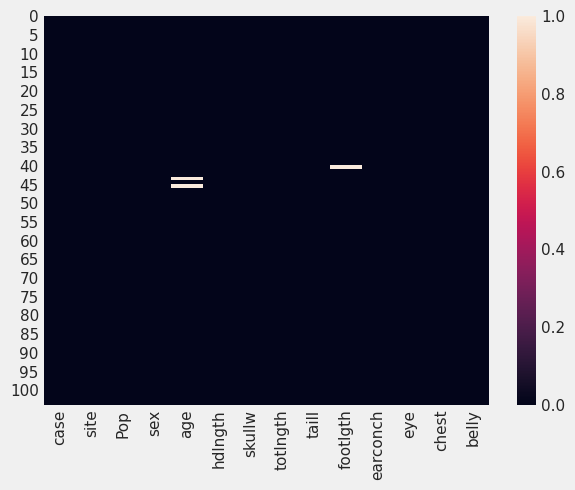

In [96]:
#figure sur la qualité des données en recherchant des valeurs manquantes ou des données dupliquées
sns.heatmap(data_opossum.isna())

On remarque que les colonnes ``ages`` et ``footlgth``  ont des valeurs ``NaN`` 

## 1.4. Nettoyage ``des données``

1. Nettoyage des donnéés avec SimpleImputer

In [97]:
from sklearn.impute import SimpleImputer

In [98]:
# Tranformer les valeurs manquantes avec simple imput.
Sim=SimpleImputer(strategy='most_frequent', missing_values=np.nan)
imputer = Sim.fit(data_opossum)
data_opossum.iloc[:,:] = Sim.transform(data_opossum)


data_opossum.head(10)

case  site  Pop sex  age  hdlngth  skullw  totlngth  taill  footlgth  \
0     1     1  Vic   m  8.0     94.1    60.4      89.0   36.0      74.5   
1     2     1  Vic   f  6.0     92.5    57.6      91.5   36.5      72.5   
2     3     1  Vic   f  6.0     94.0    60.0      95.5   39.0      75.4   
3     4     1  Vic   f  6.0     93.2    57.1      92.0   38.0      76.1   
4     5     1  Vic   f  2.0     91.5    56.3      85.5   36.0      71.0   
5     6     1  Vic   f  1.0     93.1    54.8      90.5   35.5      73.2   
6     7     1  Vic   m  2.0     95.3    58.2      89.5   36.0      71.5   
7     8     1  Vic   f  6.0     94.8    57.6      91.0   37.0      72.7   
8     9     1  Vic   f  9.0     93.4    56.3      91.5   37.0      72.4   
9    10     1  Vic   f  6.0     91.8    58.0      89.5   37.5      70.9   

   earconch   eye  chest  belly  
0      54.5  15.2   28.0   36.0  
1      51.2  16.0   28.5   33.0  
2      51.9  15.5   30.0   34.0  
3      52.2  15.2   28.0   34.0  
4      53.2  15.1   28.5   33.0  
5      53.6  14.2   30.0   32.0  
6      52.0  14.2   30.0   34.5  
7      53.9  14.5   29.0   34.0  
8      52.9  15.5   28.0   33.0  
9      53.4  14.4   27.5   32.0

2. nettoyage des données avec Dropna

In [99]:
# data_opossum = data_opossum.dropna()

In [100]:
# Vérifit après transformation si les données ont été correctement transformé.
data_opossum.isnull().sum()

case        0
site        0
Pop         0
sex         0
age         0
hdlngth     0
skullw      0
totlngth    0
taill       0
footlgth    0
earconch    0
eye         0
chest       0
belly       0
dtype: int64

In [101]:
# les informations et la description du data 
data_opossum.info()
data_opossum.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   case      104 non-null    int64  
 1   site      104 non-null    int64  
 2   Pop       104 non-null    object 
 3   sex       104 non-null    object 
 4   age       104 non-null    float64
 5   hdlngth   104 non-null    float64
 6   skullw    104 non-null    float64
 7   totlngth  104 non-null    float64
 8   taill     104 non-null    float64
 9   footlgth  104 non-null    float64
 10  earconch  104 non-null    float64
 11  eye       104 non-null    float64
 12  chest     104 non-null    float64
 13  belly     104 non-null    float64
dtypes: float64(10), int64(2), object(2)
memory usage: 11.5+ KB


case        site         age     hdlngth      skullw    totlngth  \
count  104.000000  104.000000  104.000000  104.000000  104.000000  104.000000   
mean    52.500000    3.625000    3.817308   92.602885   56.883654   87.088462   
std     30.166206    2.349086    1.894112    3.573349    3.113426    4.310549   
min      1.000000    1.000000    1.000000   82.500000   50.000000   75.000000   
25%     26.750000    1.000000    2.750000   90.675000   54.975000   84.000000   
50%     52.500000    3.000000    3.000000   92.800000   56.350000   88.000000   
75%     78.250000    6.000000    5.000000   94.725000   58.100000   90.000000   
max    104.000000    7.000000    9.000000  103.100000   68.600000   96.500000   

            taill    footlgth    earconch         eye       chest       belly  
count  104.000000  104.000000  104.000000  104.000000  104.000000  104.000000  
mean    37.009615   68.504808   48.130769   15.046154   27.000000   32.586538  
std      1.959518    4.398552    4.109380    1.050374    2.045597    2.761949  
min     32.000000   60.300000   40.300000   12.800000   22.000000   25.000000  
25%     35.875000   64.650000   44.800000   14.400000   25.500000   31.000000  
50%     37.000000   68.100000   46.800000   14.900000   27.000000   32.500000  
75%     38.000000   72.550000   52.000000   15.725000   28.000000   34.125000  
max     43.000000   77.900000   56.200000   17.800000   32.000000   40.000000

<AxesSubplot: >

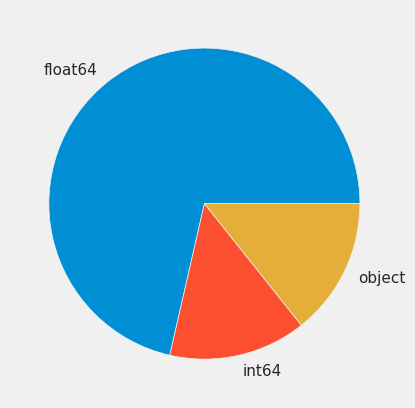

In [102]:
# Figure sur la répartion des differents types de données
data_opossum.dtypes.value_counts().plot.pie()

ici on remarque que la colonne Pop et sex sont de type objet

## 1.5. Encodage

## 1.5.1 Encodage de la colonne ``Pop``

In [103]:
from sklearn import preprocessing

In [104]:
#Transforme les colonnes string en int
le = preprocessing.LabelEncoder()


data_opossum.Pop = le.fit_transform(data_opossum.Pop)
#.columns()
enc_pop=le.classes_.copy()
data_opossum.head()

case  site  Pop sex  age  hdlngth  skullw  totlngth  taill  footlgth  \
0     1     1    0   m  8.0     94.1    60.4      89.0   36.0      74.5   
1     2     1    0   f  6.0     92.5    57.6      91.5   36.5      72.5   
2     3     1    0   f  6.0     94.0    60.0      95.5   39.0      75.4   
3     4     1    0   f  6.0     93.2    57.1      92.0   38.0      76.1   
4     5     1    0   f  2.0     91.5    56.3      85.5   36.0      71.0   

   earconch   eye  chest  belly  
0      54.5  15.2   28.0   36.0  
1      51.2  16.0   28.5   33.0  
2      51.9  15.5   30.0   34.0  
3      52.2  15.2   28.0   34.0  
4      53.2  15.1   28.5   33.0

In [105]:

print(enc_pop)

['Vic' 'other']


### 1.5.2 Encodage de la colonne ``sex``

In [106]:
# Encodage de la colonne sex
data_opossum.sex = le.fit_transform(data_opossum.sex)
enc_sex = le.classes_.copy()
data_opossum.head()

case  site  Pop  sex  age  hdlngth  skullw  totlngth  taill  footlgth  \
0     1     1    0    1  8.0     94.1    60.4      89.0   36.0      74.5   
1     2     1    0    0  6.0     92.5    57.6      91.5   36.5      72.5   
2     3     1    0    0  6.0     94.0    60.0      95.5   39.0      75.4   
3     4     1    0    0  6.0     93.2    57.1      92.0   38.0      76.1   
4     5     1    0    0  2.0     91.5    56.3      85.5   36.0      71.0   

   earconch   eye  chest  belly  
0      54.5  15.2   28.0   36.0  
1      51.2  16.0   28.5   33.0  
2      51.9  15.5   30.0   34.0  
3      52.2  15.2   28.0   34.0  
4      53.2  15.1   28.5   33.0

In [107]:
print(enc_sex)

['f' 'm']


In [108]:
# Transforme les données en types int
data_opossum = data_opossum.astype(float)


<AxesSubplot: >

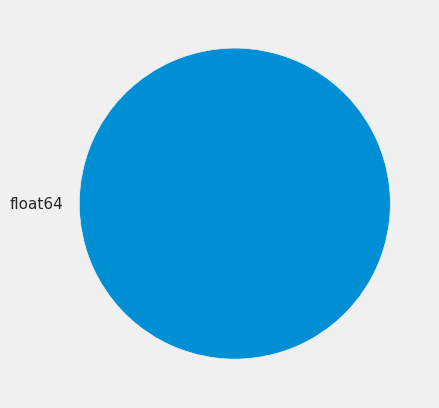

In [109]:
# Figure sur la répartion des differents types (Verification)
data_opossum.dtypes.value_counts().plot.pie()

On remarque que les données ont bien été encoder.

In [110]:
# Affiche des informations détaillées sur le DataFrame 'data_opossum', comme le nombre de colonnes, leur type de données et le nombre de valeurs non nulles.
data_opossum.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   case      104 non-null    float64
 1   site      104 non-null    float64
 2   Pop       104 non-null    float64
 3   sex       104 non-null    float64
 4   age       104 non-null    float64
 5   hdlngth   104 non-null    float64
 6   skullw    104 non-null    float64
 7   totlngth  104 non-null    float64
 8   taill     104 non-null    float64
 9   footlgth  104 non-null    float64
 10  earconch  104 non-null    float64
 11  eye       104 non-null    float64
 12  chest     104 non-null    float64
 13  belly     104 non-null    float64
dtypes: float64(14)
memory usage: 11.5 KB


In [111]:
#Affiche les statistiques descriptives pour les données dans le DataFrame 'data_opossum'.
data_opossum.describe()

case        site         Pop         sex         age     hdlngth  \
count  104.000000  104.000000  104.000000  104.000000  104.000000  104.000000   
mean    52.500000    3.625000    0.557692    0.586538    3.817308   92.602885   
std     30.166206    2.349086    0.499066    0.494839    1.894112    3.573349   
min      1.000000    1.000000    0.000000    0.000000    1.000000   82.500000   
25%     26.750000    1.000000    0.000000    0.000000    2.750000   90.675000   
50%     52.500000    3.000000    1.000000    1.000000    3.000000   92.800000   
75%     78.250000    6.000000    1.000000    1.000000    5.000000   94.725000   
max    104.000000    7.000000    1.000000    1.000000    9.000000  103.100000   

           skullw    totlngth       taill    footlgth    earconch         eye  \
count  104.000000  104.000000  104.000000  104.000000  104.000000  104.000000   
mean    56.883654   87.088462   37.009615   68.504808   48.130769   15.046154   
std      3.113426    4.310549    1.959518    4.398552    4.109380    1.050374   
min     50.000000   75.000000   32.000000   60.300000   40.300000   12.800000   
25%     54.975000   84.000000   35.875000   64.650000   44.800000   14.400000   
50%     56.350000   88.000000   37.000000   68.100000   46.800000   14.900000   
75%     58.100000   90.000000   38.000000   72.550000   52.000000   15.725000   
max     68.600000   96.500000   43.000000   77.900000   56.200000   17.800000   

            chest       belly  
count  104.000000  104.000000  
mean    27.000000   32.586538  
std      2.045597    2.761949  
min     22.000000   25.000000  
25%     25.500000   31.000000  
50%     27.000000   32.500000  
75%     28.000000   34.125000  
max     32.000000   40.000000

In [112]:
# Retourne la somme de toutes les valeurs dans chacune des colonnes du DataFrame 'data_opossum'.
data_opossum.sum()

case        5460.0
site         377.0
Pop           58.0
sex           61.0
age          397.0
hdlngth     9630.7
skullw      5915.9
totlngth    9057.2
taill       3849.0
footlgth    7124.5
earconch    5005.6
eye         1564.8
chest       2808.0
belly       3389.0
dtype: float64

count    104.000000
mean       3.817308
std        1.894112
min        1.000000
25%        2.750000
50%        3.000000
75%        5.000000
max        9.000000
Name: age, dtype: float64


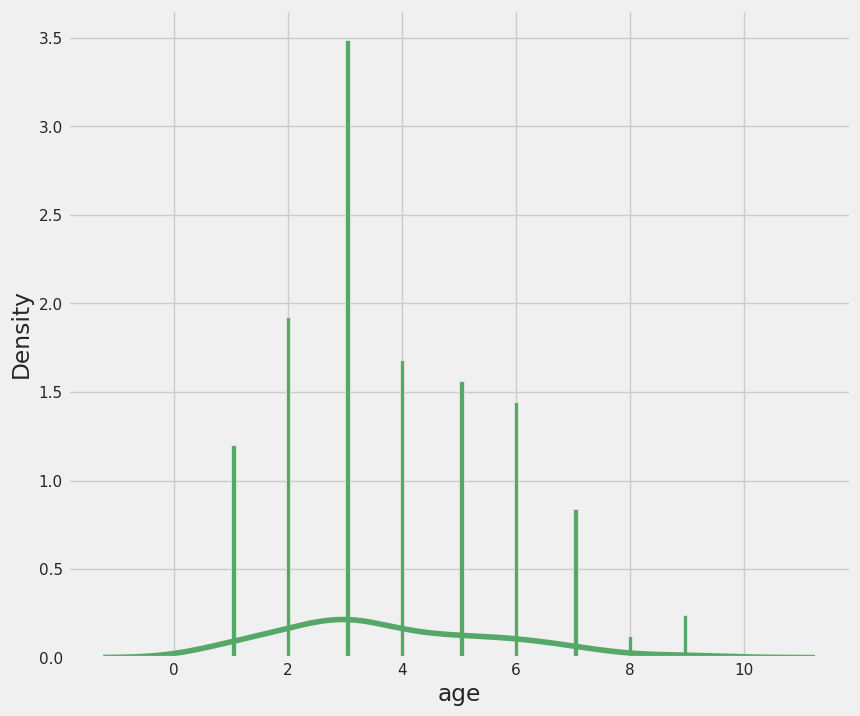

In [113]:
# Affiche les statistiques descriptives pour la colonne 'âge' dans le DataFrame 'data_opossum' et crée un graphique de distribution de cette colonne avec une taille de 9x8, utilisant la bibliothèque seaborn et en utilisant 100 boîtes de données et un paramètre alpha de 1
print(data_opossum['age'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(data_opossum['age'], color='g', bins=100, hist_kws={'alpha': 1});

In [114]:
data_opossum.groupby('age').agg(['mean', 'median'])

case             site              Pop              sex         \
          mean median      mean median      mean median      mean median   
age                                                                        
1.0  64.500000   75.5  4.600000    5.5  0.700000    1.0  0.700000    1.0   
2.0  44.562500   40.0  3.000000    2.0  0.437500    0.0  0.562500    1.0   
3.0  60.137931   58.0  3.965517    4.0  0.586207    1.0  0.620690    1.0   
4.0  55.500000   53.0  3.714286    3.5  0.571429    1.0  0.571429    1.0   
5.0  48.076923   50.0  3.307692    3.0  0.615385    1.0  0.538462    1.0   
6.0  46.333333   57.5  3.666667    4.0  0.583333    1.0  0.416667    0.0   
7.0  54.142857   54.0  3.714286    4.0  0.571429    1.0  0.857143    1.0   
8.0   1.000000    1.0  1.000000    1.0  0.000000    0.0  1.000000    1.0   
9.0  10.000000   10.0  1.000000    1.0  0.000000    0.0  0.000000    0.0   

       hdlngth         ...   footlgth          earconch               eye  \
          mean median  ...       mean median       mean median       mean   
age                    ...                                                  
1.0  87.800000  86.60  ...  66.130000  65.05  47.420000  45.80  14.380000   
2.0  93.312500  91.40  ...  70.575000  71.35  49.325000  50.10  14.806250   
3.0  92.213793  91.40  ...  67.844828  67.40  47.789655  46.40  14.882759   
4.0  92.700000  93.55  ...  68.271429  68.10  48.557143  46.80  15.228571   
5.0  94.053846  94.10  ...  68.007692  66.90  46.453846  45.60  15.838462   
6.0  93.850000  93.40  ...  68.516667  67.05  48.008333  46.25  15.175000   
7.0  94.000000  93.30  ...  68.614286  68.40  48.257143  46.00  15.100000   
8.0  94.100000  94.10  ...  74.500000  74.50  54.500000  54.50  15.200000   
9.0  93.350000  93.35  ...  74.800000  74.80  52.100000  52.10  15.200000   

                chest             belly         
    median       mean median       mean median  
age                                             
1.0  14.45  24.950000  24.25  29.300000  29.25  
2.0  14.60  27.156250  26.50  32.312500  32.00  
3.0  14.50  26.534483  26.50  32.396552  32.00  
4.0  15.35  27.357143  27.25  33.250000  33.50  
5.0  15.70  27.769231  28.00  33.807692  33.00  
6.0  15.20  27.458333  27.75  32.583333  33.25  
7.0  15.00  27.714286  27.00  34.357143  35.00  
8.0  15.20  28.000000  28.00  36.000000  36.00  
9.0  15.20  29.500000  29.50  33.500000  33.50  

[9 rows x 26 columns]

In [115]:
data_opossum.groupby('sex').agg(['mean', 'median'])

case             site              Pop              age         \
          mean median      mean median      mean median      mean median   
sex                                                                        
0.0  43.418605   40.0  2.976744    2.0  0.441860    0.0  3.976744    4.0   
1.0  58.901639   59.0  4.081967    4.0  0.639344    1.0  3.704918    3.0   

       hdlngth         ...   footlgth          earconch               eye  \
          mean median  ...       mean median       mean median       mean   
sex                    ...                                                  
0.0  92.148837   92.5  ...  69.206977   70.6  48.576744   50.8  14.811628   
1.0  92.922951   93.2  ...  68.009836   66.9  47.816393   46.4  15.211475   

                chest             belly         
    median       mean median       mean median  
sex                                             
0.0   14.8  27.337209   28.0  32.883721   33.0  
1.0   15.0  26.762295   27.0  32.377049   32.0  

[2 rows x 26 columns]

### Distribution

In [116]:
list(set(data_opossum.dtypes.tolist()))

[dtype('float64')]

### **Visu numérique**

Crée un graphique comprenant deux sous-graphiques côte à côte, utilisant la bibliothèque seaborn. Le premier graphique est un camembert montrant la distribution des valeurs de la colonne 'sexe' dans le DataFrame 'data_opossum' avec une explosion de 0,1 pour la séparation des sections, une étiquette de pourcentage automatique et un ombre. Le second graphique est un graphique de comptage des valeurs de la colonne 'sexe' dans le DataFrame 'data_opossum' et les titres des deux graphiques sont 'Distribution par sexe'.

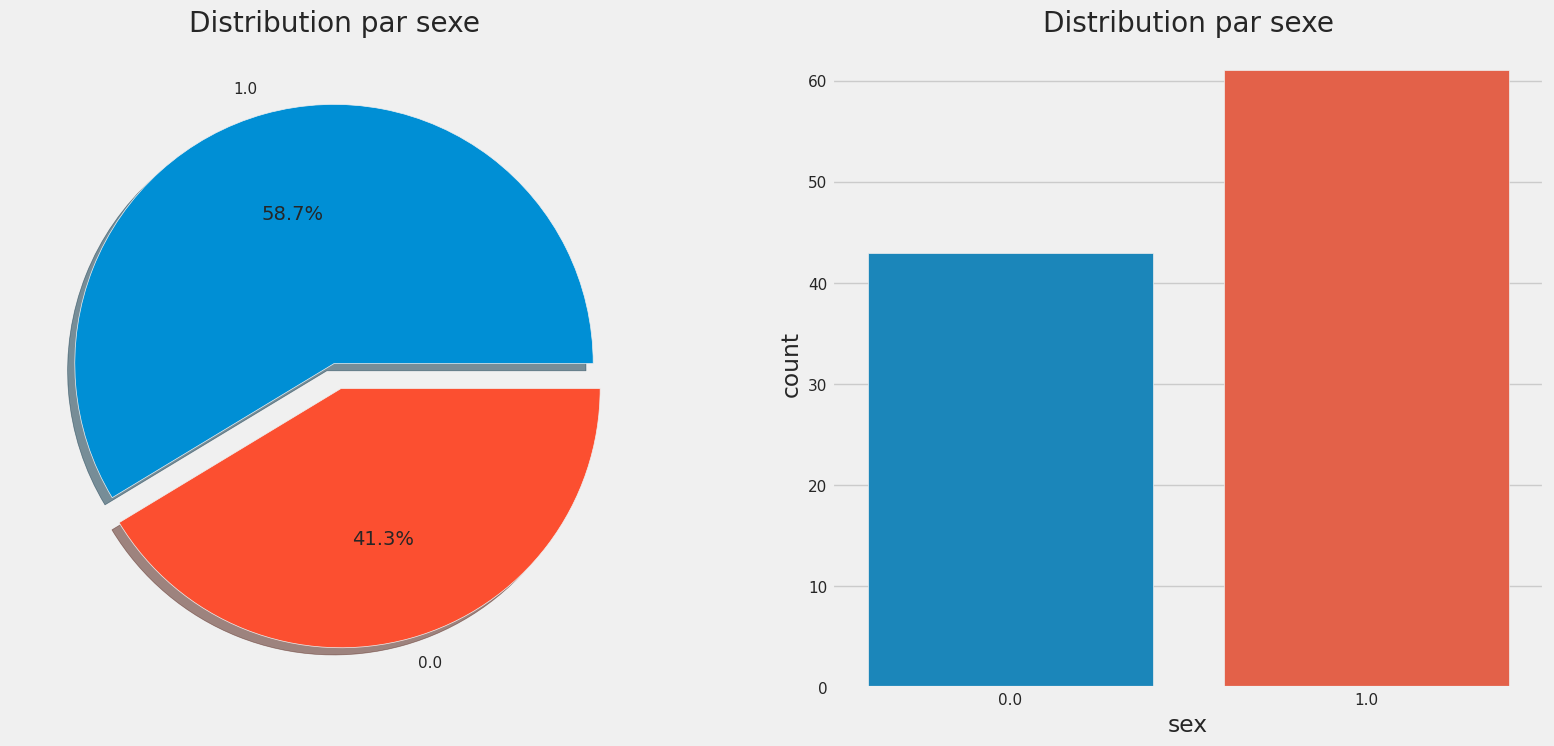

In [117]:
#Création des graphismes sur les données groupées des deux sex .
f,ax=plt.subplots(1,2,figsize=(18,8))
data_opossum['sex'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Distribution par sexe')
ax[0].set_ylabel('')
sns.countplot(data=data_opossum, x='sex', ax=ax[1])
ax[1].set_title('Distribution par sexe')
#plt.title('Distribution par sexe')
plt.show()

Crée un graphique de comptage des valeurs de la colonne ``'sex'`` dans le DataFrame 'data_opossum' en utilisant la bibliothèque seaborn. Le graphique est intitulé ``'Distribution par sex'``

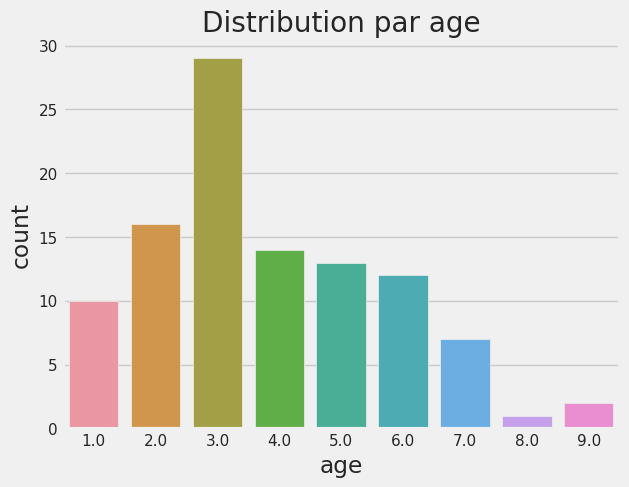

In [118]:
#Création des graphismes sur l'age des opossum avec countplot
sns.countplot(data=data_opossum, x='age')
plt.title('Distribution par age')
plt.show()

Crée un ensemble de histogrammes pour toutes les colonnes numériques du DataFrame 'data_opossum' en utilisant la fonction 'hist' de pandas. La taille de la figure est de 16x20, le nombre de boîtes est de 50 et les étiquettes de l'axe x et y ont une taille de 8.

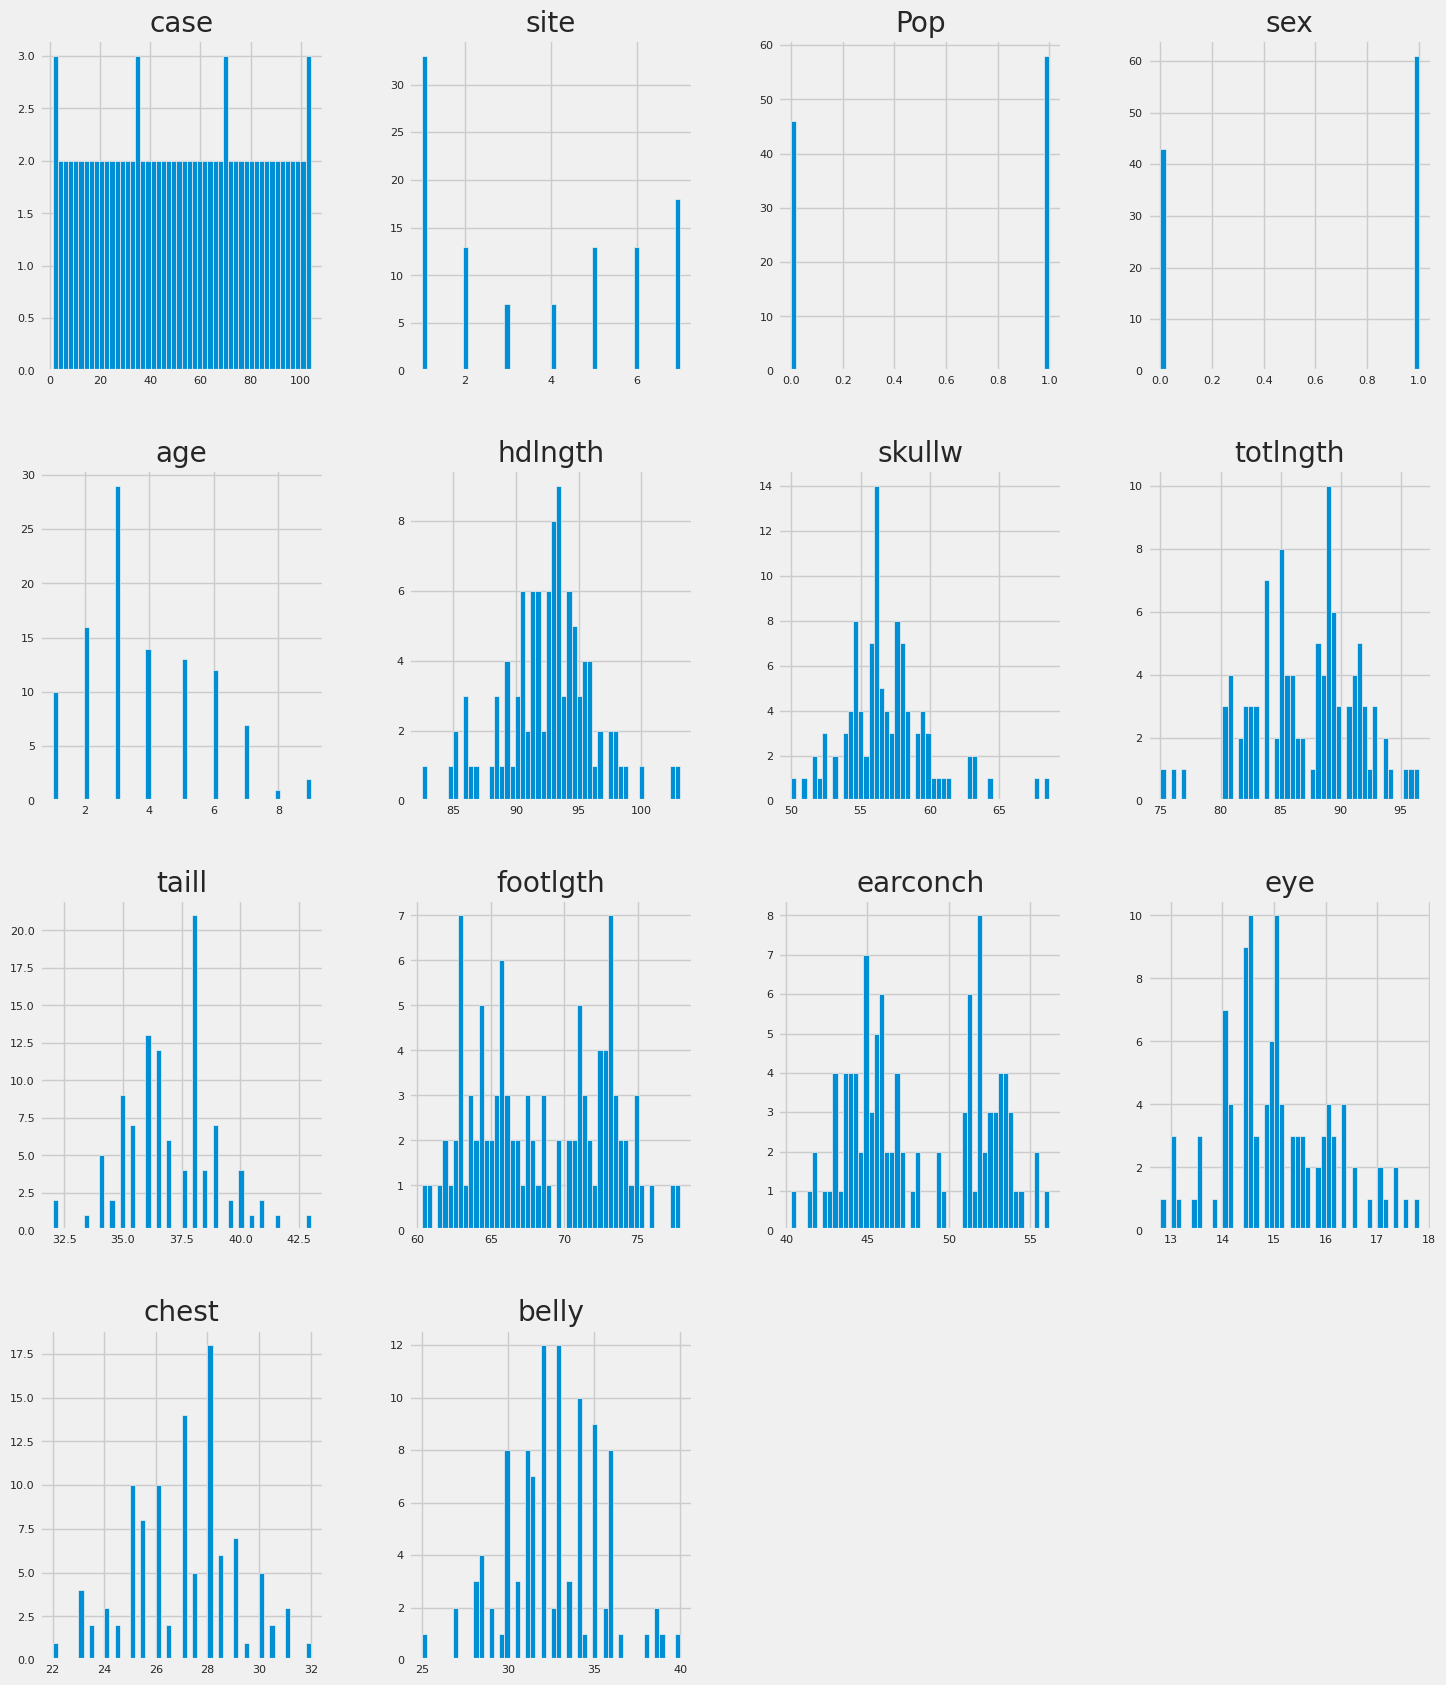

In [119]:
#Création des graphismes sur toute les colonnes du data_opossum
data_opossum.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

Crée un tableau croisé entre les colonnes 'âge' et 'sexe' du DataFrame 'data_opossum' en utilisant la fonction 'crosstab' de pandas. Les marges sont activées et le style de fond est un dégradé de couleur de la carte 'summer_r'.

In [120]:
pd.crosstab(data_opossum.age, data_opossum.sex, margins = True).style.background_gradient(cmap='summer_r')

## 7. Correlation entre variables

Crée une variable 'data_opossum_corr' qui contient les corrélations entre toutes les colonnes du DataFrame 'data_opossum' et la colonne 'belly'. On crée une variable 'golden_features_list' qui contient les valeurs de 'data_opossum_corr' dont la corrélation absolue est supérieure à 0.5. Il est trié par ordre décroissant. Ensuite, on imprime le nombre de caractéristiques fortement corrélées avec belly et la liste de ces caractéristiques fortement corrélées

In [121]:
data_opossum_corr = data_opossum['age'].corr(data_opossum['chest'])


In [122]:
data_opossum_corr = data_opossum.select_dtypes(include=['float64', 'int64']).corrwith(data_opossum['age'])
data_opossum_corr


case       -0.191921
site       -0.124648
Pop        -0.076043
sex        -0.071015
age         1.000000
hdlngth     0.321680
skullw      0.290232
totlngth    0.264556
taill       0.124729
footlgth    0.124913
earconch    0.045009
eye         0.239492
chest       0.338276
belly       0.350094
dtype: float64

Crée un graphique de la matrice de corrélation en utilisant la fonction 'pairplot' de seaborn pour le DataFrame 'data_opossum'. Le graphique affiche des diagrammes de dispersion pour toutes les paires de colonnes numériques dans le DataFrame. La hauteur de la figure est définie sur 3.

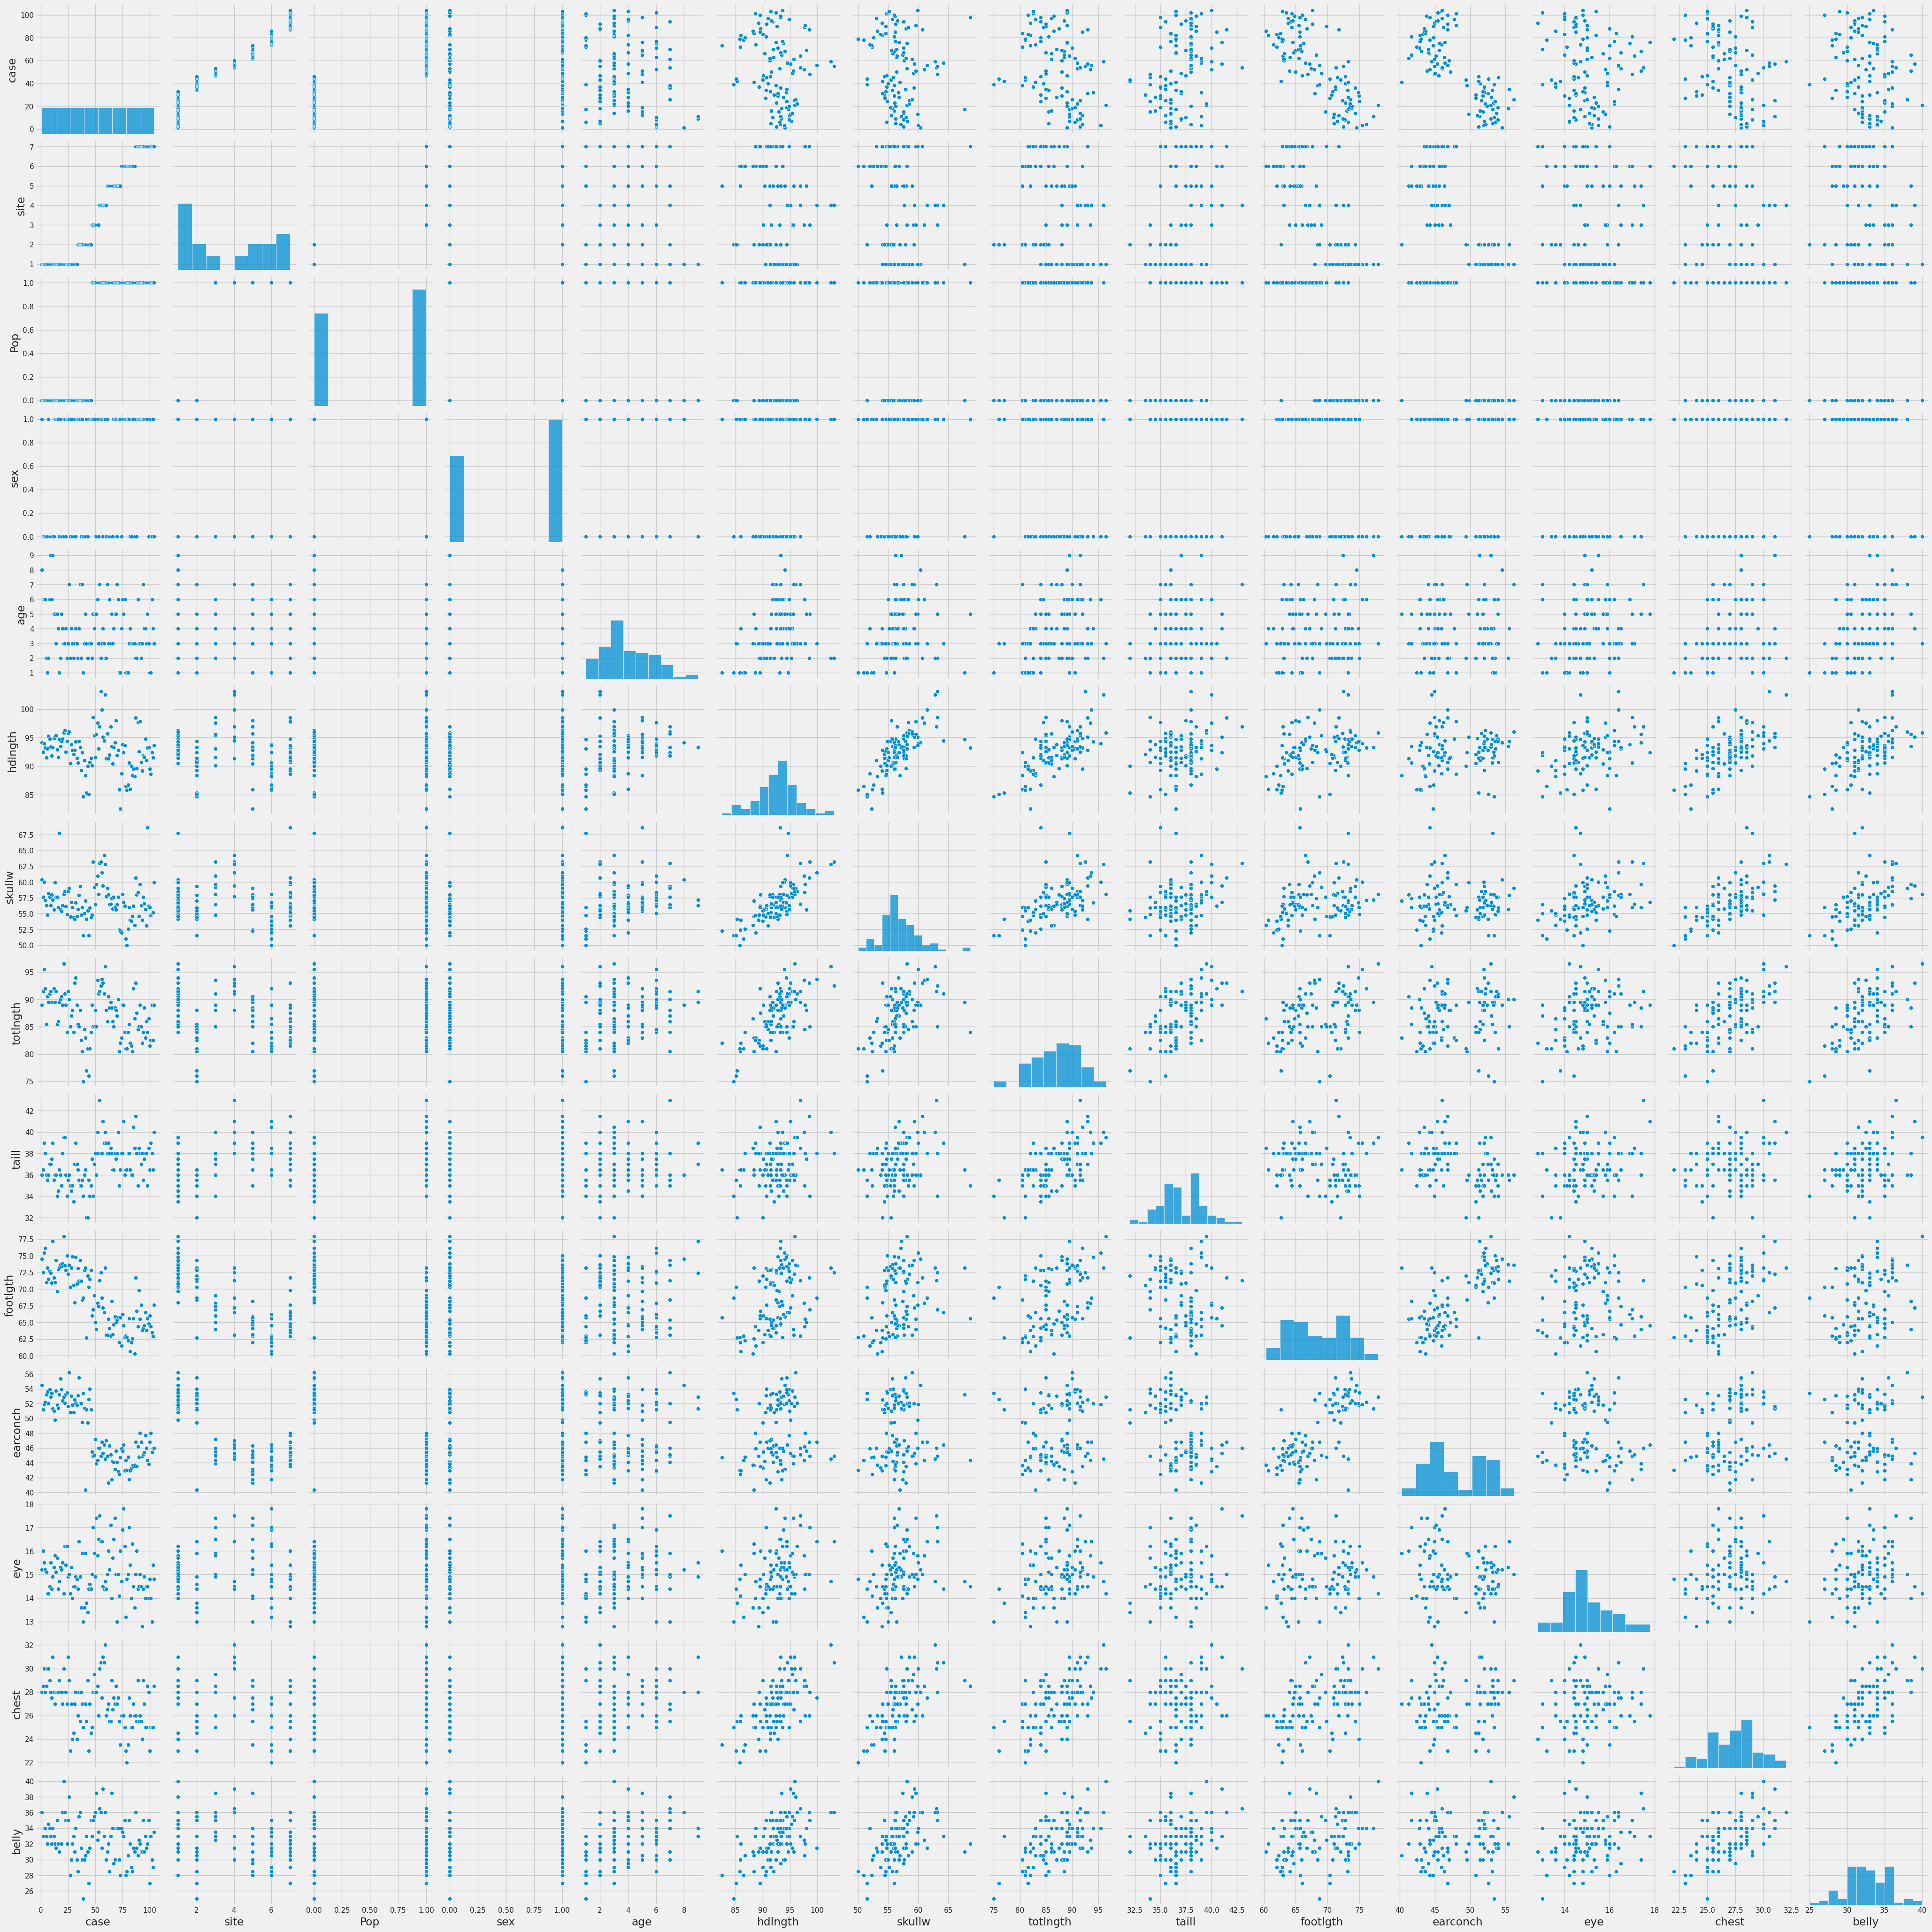

In [123]:
# Création des graphismes avec pairplot sur toutes les colonnes des données.
sns.pairplot(data=data_opossum, height=3)

Crée une liste 'individual_features_df' qui contient des DataFrames pour chaque colonne individuelle dans le DataFrame 'data_opossum', sauf la colonne 'belly'. Pour chaque DataFrame, la colonne 'belly' est incluse et toutes les lignes qui contiennent une valeur de 0 pour la colonne individuelle sont supprimées. Ensuite, on crée un dictionnaire 'all_correlations' qui contient les corrélations entre chaque colonne individuelle et la colonne 'belly' pour chaque DataFrame dans 'individual_features_df'. Le dictionnaire est trié par valeur de corrélation croissante. Enfin, on affiche chaque colonne et sa corrélation avec 'belly' en utilisant une boucle for avec une mise en forme pour l'affichage.

In [124]:
data_opossum.index.values

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103])

Cette ligne de code utilise la fonction pairplot de la bibliothèque Seaborn (sns) pour créer un graphique de tous les diagrammes de dispersion possibles entre les colonnes de data_opossum. La fonction pairplot dessine un graphique de dispersion pour chaque paire de colonnes de data_opossum. Le paramètre "height" définit la hauteur de chaque graphique de dispersion. Le paramètre "hue" est utilisé pour colorer les points en fonction de la colonne 'sex'. Cela permet de visualiser les relations entre les différentes variables ainsi que de voir comment la variable 'sex' influence ces relations.

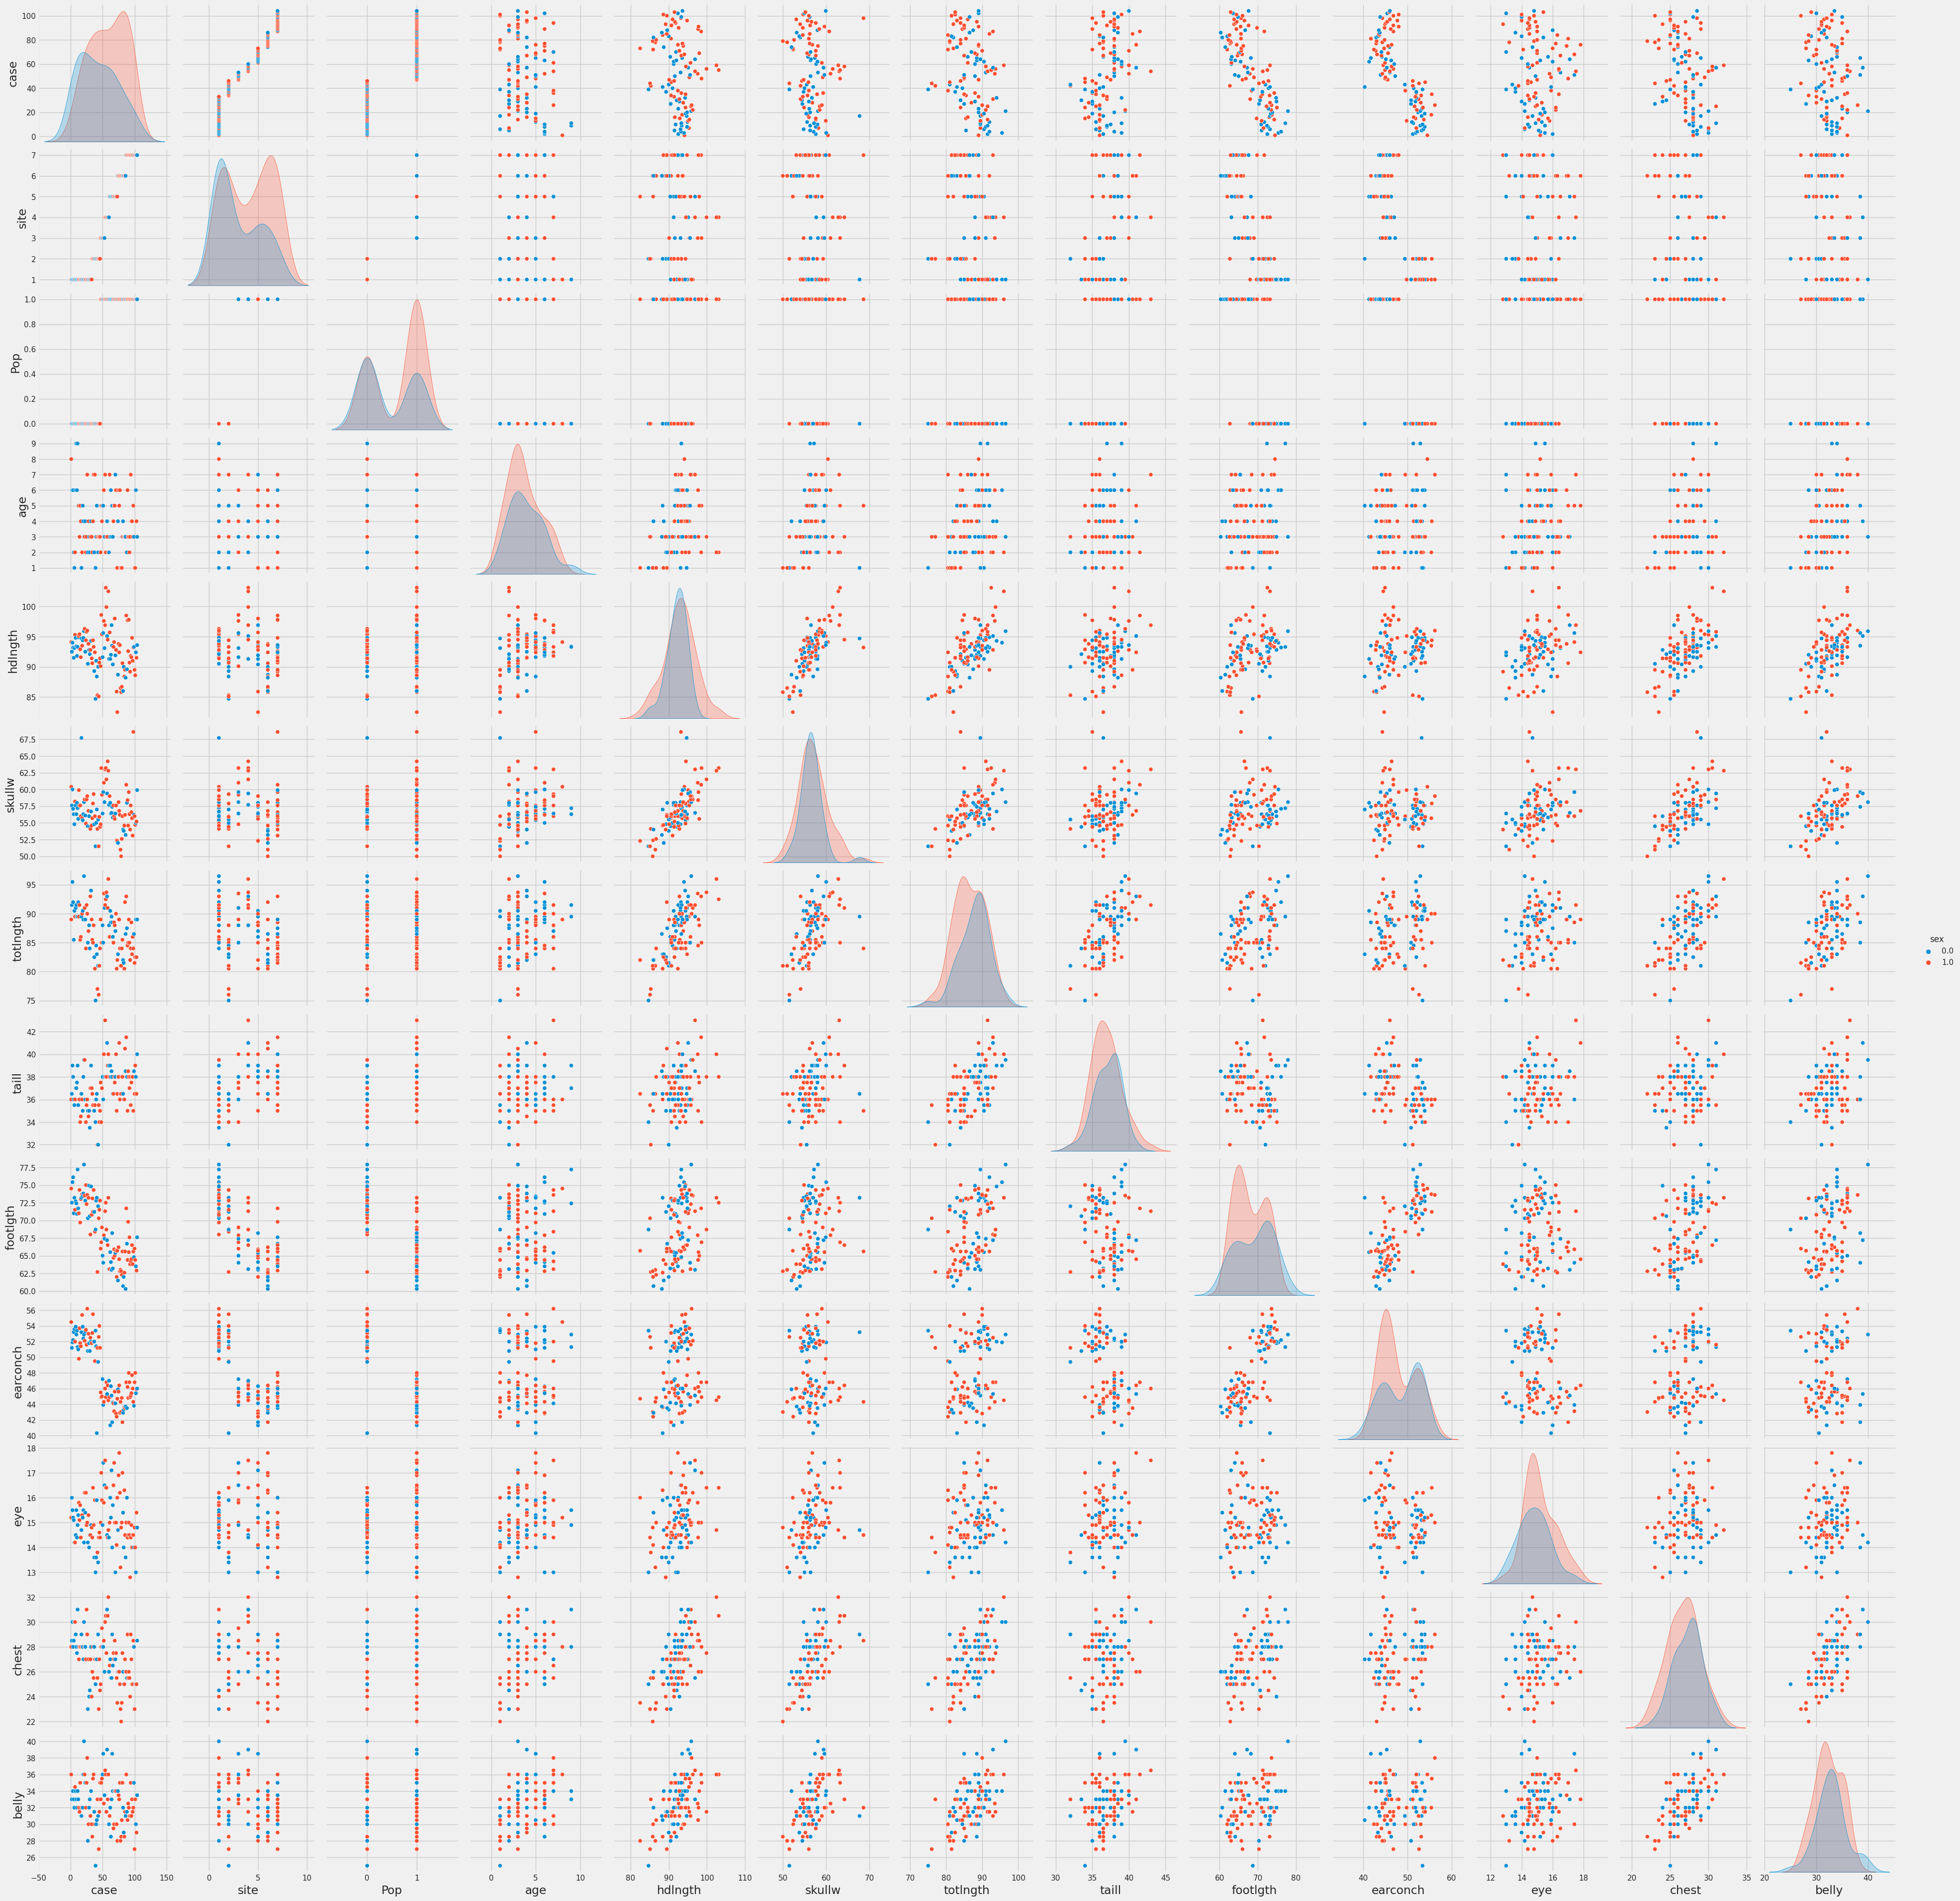

In [125]:
#création des graphismes pairplot sur toutes les colonnes des données.
sns.pairplot(data=data_opossum, height=3, hue ='sex')

Cette ligne de code utilise la fonction heatmap de la bibliothèque Seaborn pour créer un graphique de la matrice de corrélation de data_opossum. Il calcule les corrélations entre les colonnes de data_opossum en utilisant la méthode corr() de dataframe Pandas. Le paramètre "annot" est défini sur True pour afficher les valeurs de corrélation à l'intérieur de chaque case. Le paramètre "cmap" est utilisé pour définir la palette de couleurs utilisée dans le graphique, "RdYlGn" signifie Red-Yellow-Green. Le paramètre "linewidths" définit l'épaisseur de la bordure de chaque case. Le paramètre "annot_kws" est utilisé pour définir les options de mise en forme des valeurs de corrélation, ici la taille est fixée à 7. La dernière ligne utilise la propriété columns pour récupérer la liste des colonnes de data_opossum.

Enfin, la fonction plt.show() est utilisée pour afficher le graphique créé. Ce graphique permet de visualiser les corrélations entre les différentes variables de data_opossum de manière claire et intuitive. Les cases plus foncées indiquent une corrélation plus forte entre les variables associées

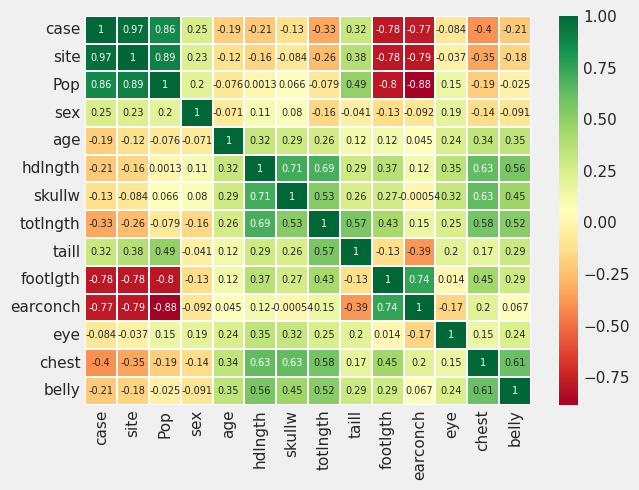

Index(['case', 'site', 'Pop', 'sex', 'age', 'hdlngth', 'skullw', 'totlngth',
       'taill', 'footlgth', 'earconch', 'eye', 'chest', 'belly'],
      dtype='object')

In [126]:
#Création du graphisme pour l'Etude de la correlation avec heatmap
sns.heatmap(data_opossum.corr(), annot=True,cmap='RdYlGn',linewidths=0.2,annot_kws={'size':7})
plt.show()
data_opossum.columns

Cette ligne de code utilise la méthode corr() de dataframe Pandas pour calculer les corrélations entre les colonnes de data_opossum et crée un dataframe appelé data_opossum_corr qui contient les valeurs de corrélation

In [127]:
data_opossum_corr = data_opossum.corr()
data_opossum_corr

case      site       Pop       sex       age   hdlngth  \
case      1.000000  0.970353  0.860281  0.253980 -0.191921 -0.209177   
site      0.970353  1.000000  0.892326  0.232817 -0.124648 -0.163646   
Pop       0.860281  0.892326  1.000000  0.195811 -0.076043  0.001267   
sex       0.253980  0.232817  0.195811  1.000000 -0.071015  0.107200   
age      -0.191921 -0.124648 -0.076043 -0.071015  1.000000  0.321680   
hdlngth  -0.209177 -0.163646  0.001267  0.107200  0.321680  1.000000   
skullw   -0.125065 -0.083548  0.065908  0.080014  0.290232  0.710827   
totlngth -0.334329 -0.260843 -0.078666 -0.160200  0.264556  0.691094   
taill     0.315351  0.380444  0.490856 -0.040917  0.124729  0.287429   
footlgth -0.781421 -0.784034 -0.795565 -0.134679  0.124913  0.374455   
earconch -0.773727 -0.790716 -0.883293 -0.091559  0.045009  0.121463   
eye      -0.084078 -0.036987  0.148594  0.188371  0.239492  0.347175   
chest    -0.402303 -0.345494 -0.194957 -0.139074  0.338276  0.631498   
belly    -0.211671 -0.175266 -0.024788 -0.090777  0.350094  0.562663   

            skullw  totlngth     taill  footlgth  earconch       eye  \
case     -0.125065 -0.334329  0.315351 -0.781421 -0.773727 -0.084078   
site     -0.083548 -0.260843  0.380444 -0.784034 -0.790716 -0.036987   
Pop       0.065908 -0.078666  0.490856 -0.795565 -0.883293  0.148594   
sex       0.080014 -0.160200 -0.040917 -0.134679 -0.091559  0.188371   
age       0.290232  0.264556  0.124729  0.124913  0.045009  0.239492   
hdlngth   0.710827  0.691094  0.287429  0.374455  0.121463  0.347175   
skullw    1.000000  0.526413  0.255921  0.273908 -0.000537  0.321991   
totlngth  0.526413  1.000000  0.565646  0.430461  0.154484  0.247786   
taill     0.255921  0.565646  1.000000 -0.128249 -0.385136  0.198134   
footlgth  0.273908  0.430461 -0.128249  1.000000  0.744739  0.013674   
earconch -0.000537  0.154484 -0.385136  0.744739  1.000000 -0.165092   
eye       0.321991  0.247786  0.198134  0.013674 -0.165092  1.000000   
chest     0.629737  0.577890  0.174997  0.448067  0.199230  0.149338   
belly     0.451838  0.519465  0.294493  0.292141  0.066527  0.235716   

             chest     belly  
case     -0.402303 -0.211671  
site     -0.345494 -0.175266  
Pop      -0.194957 -0.024788  
sex      -0.139074 -0.090777  
age       0.338276  0.350094  
hdlngth   0.631498  0.562663  
skullw    0.629737  0.451838  
totlngth  0.577890  0.519465  
taill     0.174997  0.294493  
footlgth  0.448067  0.292141  
earconch  0.199230  0.066527  
eye       0.149338  0.235716  
chest     1.000000  0.606170  
belly     0.606170  1.000000

### Feature to ``feature relationship``

In [128]:
# Ce code utilise la méthode "groupby" sur  "data_opossum" pour regrouper les lignes en fonction de la colonne "sex".
data_opossum.groupby('sex').agg(['mean', 'median'])


case             site              Pop              age         \
          mean median      mean median      mean median      mean median   
sex                                                                        
0.0  43.418605   40.0  2.976744    2.0  0.441860    0.0  3.976744    4.0   
1.0  58.901639   59.0  4.081967    4.0  0.639344    1.0  3.704918    3.0   

       hdlngth         ...   footlgth          earconch               eye  \
          mean median  ...       mean median       mean median       mean   
sex                    ...                                                  
0.0  92.148837   92.5  ...  69.206977   70.6  48.576744   50.8  14.811628   
1.0  92.922951   93.2  ...  68.009836   66.9  47.816393   46.4  15.211475   

                chest             belly         
    median       mean median       mean median  
sex                                             
0.0   14.8  27.337209   28.0  32.883721   33.0  
1.0   15.0  26.762295   27.0  32.377049   32.0  

[2 rows x 26 columns]

**Idem pour Pop**

In [129]:
# Ce code utilise la méthode "groupby" sur  "data_opossum" pour regrouper les lignes en fonction de la colonne "Pop".
data_opossum.groupby('Pop').agg(['mean', 'median'])


case             site              sex              age         \
     mean median      mean median      mean median      mean median   
Pop                                                                   
0.0  23.5   23.5  1.282609    1.0  0.478261    0.0  3.978261    3.0   
1.0  75.5   75.5  5.482759    6.0  0.672414    1.0  3.689655    3.0   

       hdlngth         ...   footlgth          earconch               eye  \
          mean median  ...       mean median       mean median       mean   
Pop                    ...                                                  
0.0  92.597826  93.15  ...  72.415217   72.8  52.186957  52.15  14.871739   
1.0  92.606897  92.40  ...  65.403448   65.2  44.913793  44.90  15.184483   

                chest             belly         
    median       mean median       mean median  
Pop                                             
0.0   14.9  27.445652   28.0  32.663043   32.5  
1.0   15.0  26.646552   26.0  32.525862   32.5  

[2 rows x 26 columns]

In [130]:
quantitative_features_list = ['hdlngth', 'skullw', 
       'footlgth', 'chest', 'belly']
data_opossum_quantitative_values = data_opossum[quantitative_features_list]
data_opossum_quantitative_values.head()

hdlngth  skullw  footlgth  chest  belly
0     94.1    60.4      74.5   28.0   36.0
1     92.5    57.6      72.5   28.5   33.0
2     94.0    60.0      75.4   30.0   34.0
3     93.2    57.1      76.1   28.0   34.0
4     91.5    56.3      71.0   28.5   33.0

Le code crée une liste vide et boucle sur les colonnes d'un DataFrame (sauf la dernière), filtrant les lignes où la colonne en cours de boucle est différente de zéro. Il ajoute les colonnes filtrées à la liste vide et calcule les corrélations entre chaque colonne et la colonne "belly". Il trie les corrélations et affiche les résultats formatés pour une meilleure lisibilité.

In [131]:
features_to_analyse = [x for x in data_opossum_quantitative_values if x in quantitative_features_list]
features_to_analyse.append('age')
features_to_analyse

['hdlngth', 'skullw', 'footlgth', 'chest', 'belly', 'age']

Ce code crée une nouvelle liste appelée "features_to_analyse" en utilisant une compréhension de liste pour inclure uniquement les éléments de "data_opossum_quantitative_values" qui sont présents dans "quantitative_features_list". Il ajoute ensuite la colonne "âge" à cette liste et affiche le résultat final.

In [132]:
features_to_analyse

['hdlngth', 'skullw', 'footlgth', 'chest', 'belly', 'age']

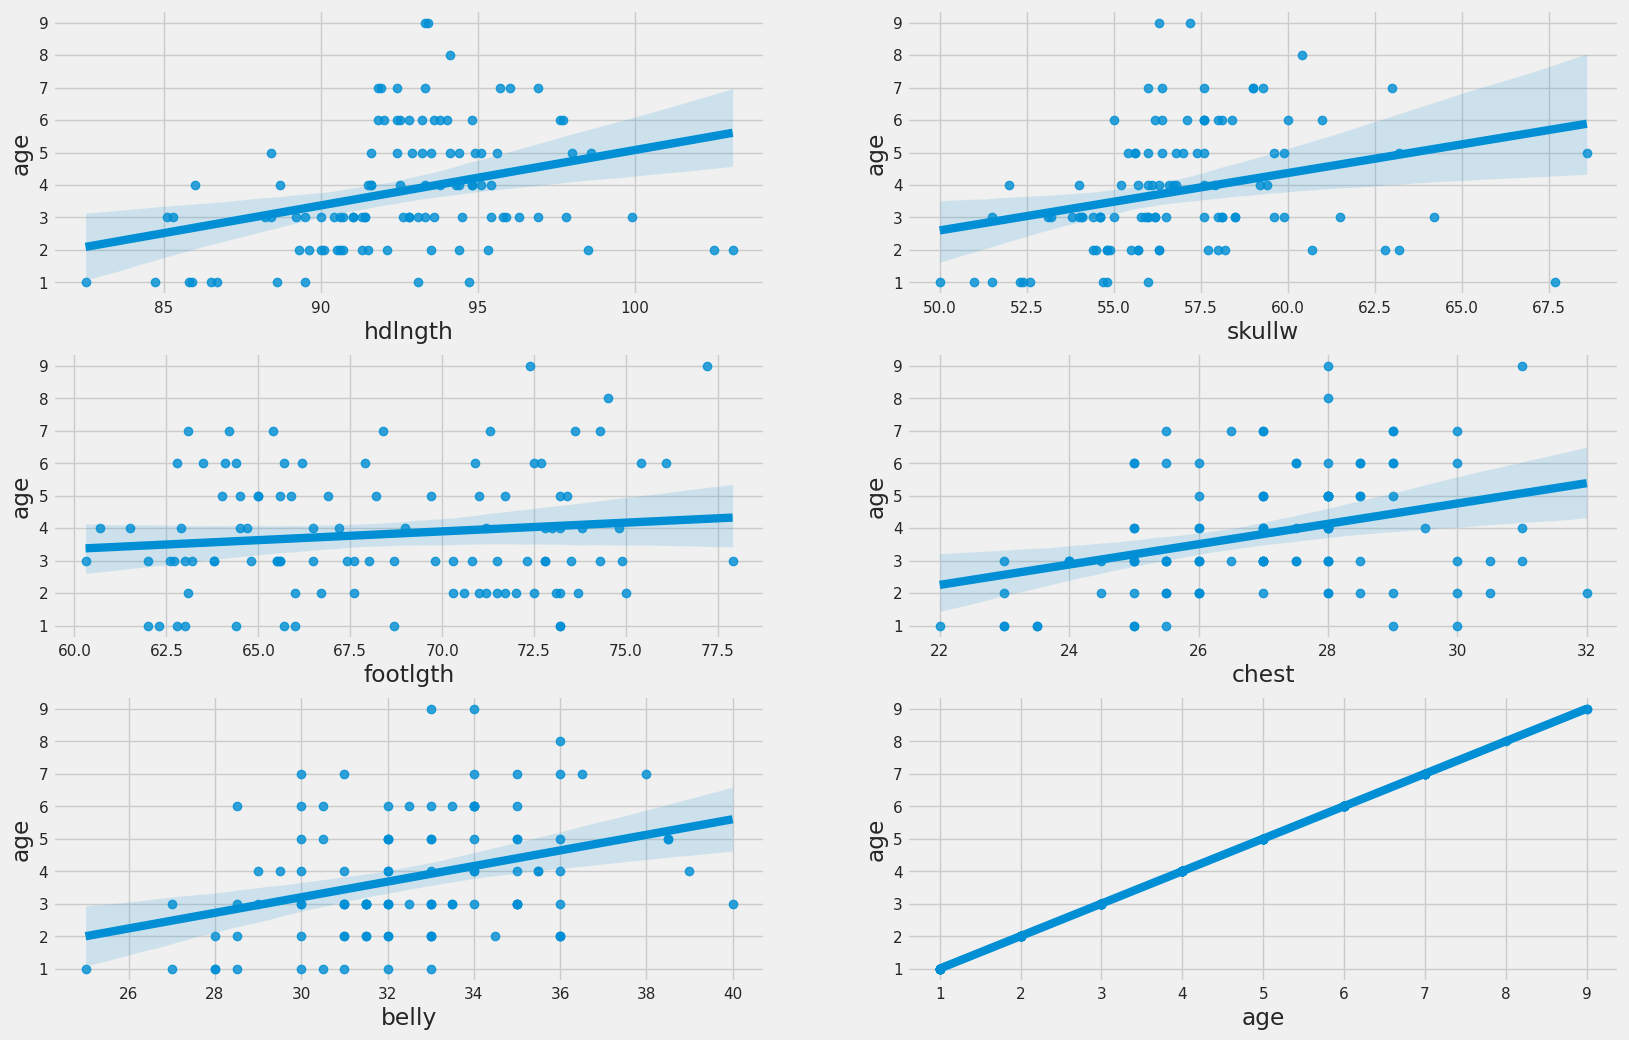

In [133]:
fig, ax = plt.subplots(round(len(features_to_analyse) / 2), 2, figsize = (18, 12))

for i, ax in enumerate(fig.axes):
    if i < len(features_to_analyse) :
        f
        sns.regplot(x=features_to_analyse[i],y='age', data=data_opossum[features_to_analyse], ax=ax)

Cette ligne de code utilise la fonction subplots de Matplotlib pour créer une figure et des axes pour les graphiques. Le nombre d'axes créés dépend de la longueur de la liste features_to_analyse divisée par 2, arrondie à l'entier supérieur. La taille de la figure est également définie sur 18 x 12.

Ensuite, il utilise une boucle pour parcourir les axes créés et pour chaque itération, il utilise la fonction regplot de Seaborn pour tracer un graphique de régression linéaire entre la variable en cours d'itération de la liste features_to_analyse et la variable 'age' dans data_opossum. Il utilise les arguments x et y pour spécifier les variables à utiliser pour le graphique de régression linéaire, et l'argument data pour spécifier le dataframe à utiliser. Il utilise également l'argument ax pour spécifier l'axe où le graphique doit être tracé.
Cela permet de tracer des graphiques de régression linéaire entre chaque variable de features_to_analyse et la variable 'age' pour visualiser les relations linéaires entre ces variables.

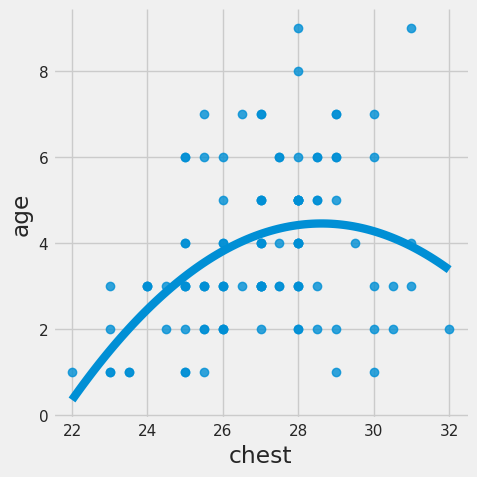

In [134]:
data_opossum500 = data_opossum[:][:500]

# Selecting the 1st 500 rows of the data

sns.lmplot(x ="chest", y ="age", data = data_opossum500, order = 2, ci = None)

Ce code sélectionne les 500 premières lignes du jeu de données "data_opossum" et les enregistre dans une nouvelle variable appelée "data_opossum500". Il utilise ensuite la méthode "sns.lmplot()" de la bibliothèque Seaborn pour tracer un graphique de régression linéaire entre les colonnes "chest" et "âge" dans les données "data_opossum500". Le paramètre "order" définit l'ordre de la régression polynomiale, ici 2, et "ci" est défini sur "None" pour désactiver l'affichage des intervalles de confiance.

In [135]:
# quantitative_features_list[:-1] car la dernière colonne est SalePrice et nous voulons la conserver
categorical_features = [a for a in quantitative_features_list[:-1] + data_opossum.columns.tolist() if (a not in quantitative_features_list[:-1]) or (a not in data_opossum.columns.tolist())]
df_categ = data_opossum[categorical_features]
df_categ.head()

case  site  Pop  sex  age  totlngth  taill  earconch   eye  belly
0   1.0   1.0  0.0  1.0  8.0      89.0   36.0      54.5  15.2   36.0
1   2.0   1.0  0.0  0.0  6.0      91.5   36.5      51.2  16.0   33.0
2   3.0   1.0  0.0  0.0  6.0      95.5   39.0      51.9  15.5   34.0
3   4.0   1.0  0.0  0.0  6.0      92.0   38.0      52.2  15.2   34.0
4   5.0   1.0  0.0  0.0  2.0      85.5   36.0      53.2  15.1   33.0

Cette ligne de code utilise la notation de sélection de colonne pour accéder à la colonne "chest" dans le dataframe data_opossum, puis utilise la méthode describe() pour générer un résumé statistique des données de cette colonne. Cela inclut des informations telles que la moyenne, l'écart-type, le minimum, le quartile inférieur, le median, le quartile supérieur et le maximum, ainsi que le nombre de valeurs non manquantes. Cette méthode fournit des informations utiles sur la distribution des données de la colonne "chest" et permet de comprendre les propriétés statistiques de ces données.

In [136]:
# description de la colonne "age"
data_opossum["age"].describe()

count    104.000000
mean       3.817308
std        1.894112
min        1.000000
25%        2.750000
50%        3.000000
75%        5.000000
max        9.000000
Name: age, dtype: float64

### Outlier

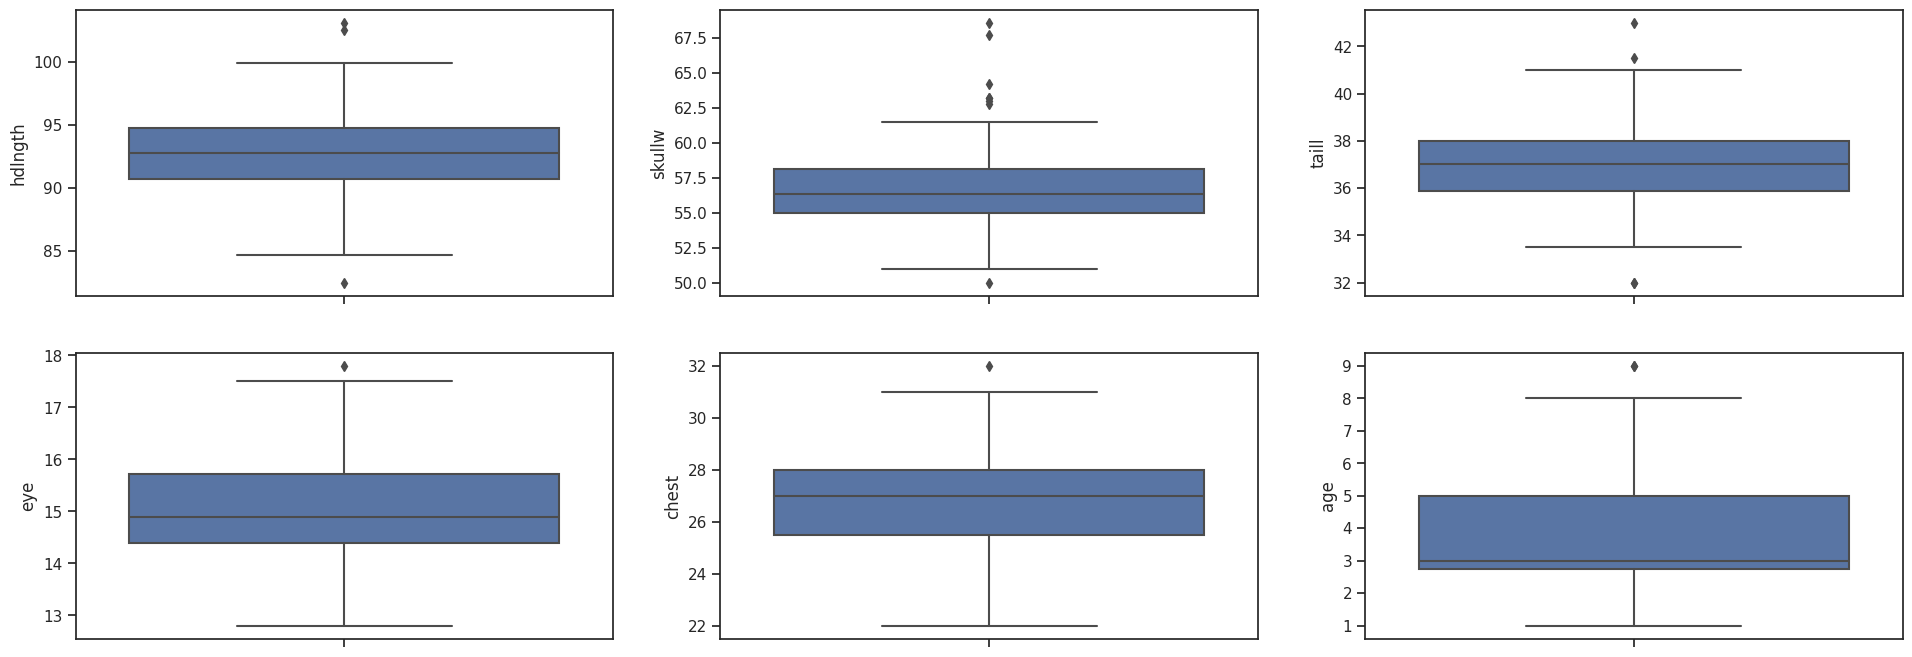

In [137]:
# Visualiser les outliers avec boxplot()
sns.set(style="ticks") 
plt.figure(figsize=(21,12))
plt.subplot(3,3,1)
sns.boxplot(data=data_opossum, y=data_opossum['hdlngth'])
plt.subplot(3,3,2)
sns.boxplot(data=data_opossum, y=data_opossum['skullw'])
plt.subplot(3,3,3)
sns.boxplot(data=data_opossum, y=data_opossum['taill'])
plt.subplot(3,3,4)
sns.boxplot(data=data_opossum, y=data_opossum['eye'])
plt.subplot(3,3,5)
sns.boxplot(data=data_opossum, y=data_opossum['chest'])
plt.subplot(3,3,6)
sns.boxplot(data=data_opossum, y=data_opossum['age'])
plt.show()

In [138]:
data_opossum.columns

Index(['case', 'site', 'Pop', 'sex', 'age', 'hdlngth', 'skullw', 'totlngth',
       'taill', 'footlgth', 'earconch', 'eye', 'chest', 'belly'],
      dtype='object')

Cette ligne de code définit une fonction nommée "remove_outlier" qui prend en entrée un dataframe df_in et un nom de colonne col_name. La fonction calcule les quartiles inférieur et supérieur (q1 et q3) en utilisant la méthode quantile() de dataframe Pandas. Il calcule ensuite l'écart interquartile (iqr) en soustrayant q1 de q3. Il définit ensuite des limites inférieure et supérieure en utilisant les valeurs calculées q1,q3, et iqr. Il utilise ensuite la méthode loc de dataframe pour sélectionner les lignes où les valeurs de la colonne spécifiée sont dans l'intervalle défini par ces limites, et retourne un nouveau dataframe sans les outliers. Cette fonction permet de facilement détecter et supprimer les outliers d'une colonne spécifique dans un dataframe.

In [139]:
# supprimer la valeur aberrante
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out

Cette ligne de code définit une fonction nommée "remove_outliers" qui prend en entrée un dataframe data_opossum et un nom de colonne col. La fonction utilise la fonction percentile de numpy pour calculer les quartiles inférieur et supérieur (Q1 et Q3) de la colonne spécifiée. Il calcule ensuite l'écart interquartile (IQR) en soustrayant Q1 de Q3. Il définit ensuite des limites inférieure et supérieure en utilisant les valeurs calculées Q1, Q3 et IQR. Il utilise ensuite la méthode drop de dataframe pour supprimer les lignes où les valeurs de la colonne spécifiée dépassent ces limites. Il affiche également les valeurs calculées Q1, Q3, Min, Max et nombre de lignes supprimées. Cette fonction permet de facilement détecter et supprimer les outliers d'une colonne spécifique dans un dataframe.

In [140]:
def remove_outliers(data_opossum, col):
    """Function that removes outliers under Q1 and above Q3."""
    #On utilise l'IQR
    Q1 = np.percentile(data_opossum[col], 25,method = 'midpoint')
    Q3 = np.percentile(data_opossum[col], 75,method = 'midpoint')
    IQR = Q3 - Q1

    max_v=Q3+1.5*IQR
    min_v=Q1-1.5*IQR

    # Upper bound
    ind_upper = np.where(data_opossum[col] >= max_v)
    # Lower bound
    ind_lower = np.where(data_opossum[col] > min_v)

    # number of rows before removal
    nb_of_rows_before = data_opossum.shape[0]

    # Suppresion des Outliers
    data_opossum.drop(data_opossum[data_opossum[col] > max_v].index, inplace = True)
    data_opossum.drop(data_opossum[data_opossum[col] < min_v].index, inplace = True)
    
    print(f"'{col}' => Q1 : {Q1} - Q3 : {Q3} - Min : {min_v} - Max : {max_v}")
    
    # number of rows after removal
    nb_of_rows_after = data_opossum.shape[0]
    nb_of_rows_removed = nb_of_rows_before #- nb_of_rows_after
 
   

Cette ligne de code appelle la fonction remove_outliers pour chaque colonne spécifiée dans la liste. Cela permet de supprimer les outliers pour chacune de ces colonnes dans le dataframe data_opossum. Il est important de noter que cette suppression d'outliers peut avoir un impact sur les résultats de l'analyse en fonction de la taille de l'échantillon et de la distribution des données. Il est donc important de comprendre les implications de cette suppression avant de continuer avec l'analyse.

In [141]:
remove_outliers(data_opossum, 'age')
remove_outliers(data_opossum, 'hdlngth')
remove_outliers(data_opossum, 'skullw')
remove_outliers(data_opossum, 'totlngth')
remove_outliers(data_opossum, 'footlgth')
remove_outliers(data_opossum, 'chest')
remove_outliers(data_opossum, 'belly')


'age' => Q1 : 2.5 - Q3 : 5.0 - Min : -1.25 - Max : 8.75
'hdlngth' => Q1 : 90.65 - Q3 : 94.75 - Min : 84.50000000000001 - Max : 100.89999999999999
'skullw' => Q1 : 54.95 - Q3 : 58.1 - Min : 50.22500000000001 - Max : 62.825
'totlngth' => Q1 : 84.0 - Q3 : 89.5 - Min : 75.75 - Max : 97.75
'footlgth' => Q1 : 64.45 - Q3 : 72.6 - Min : 52.225000000000016 - Max : 84.82499999999999
'chest' => Q1 : 25.5 - Q3 : 28.0 - Min : 21.75 - Max : 31.75
'belly' => Q1 : 31.0 - Q3 : 34.0 - Min : 26.5 - Max : 38.5


Ce résultat affiche les statistiques de première et de troisième quartile (Q1 et Q3), ainsi que les valeurs minimales et maximales pour plusieurs colonnes de données. Les colonnes incluent "âge", "hdlngth", "skullw", "totlngth", "footlgth", "chest" et "belly". Les statistiques de première et de troisième quartile indiquent la répartition des données dans la colonne, en divisant les données en quatre parties égales. Les valeurs minimales et maximales indiquent les valeurs les plus basses et les plus élevées dans la colonne. En ensemble, ces statistiques donnent une vue d'ensemble des propriétés statistiques de chaque colonne de données.

<AxesSubplot: ylabel='age'>

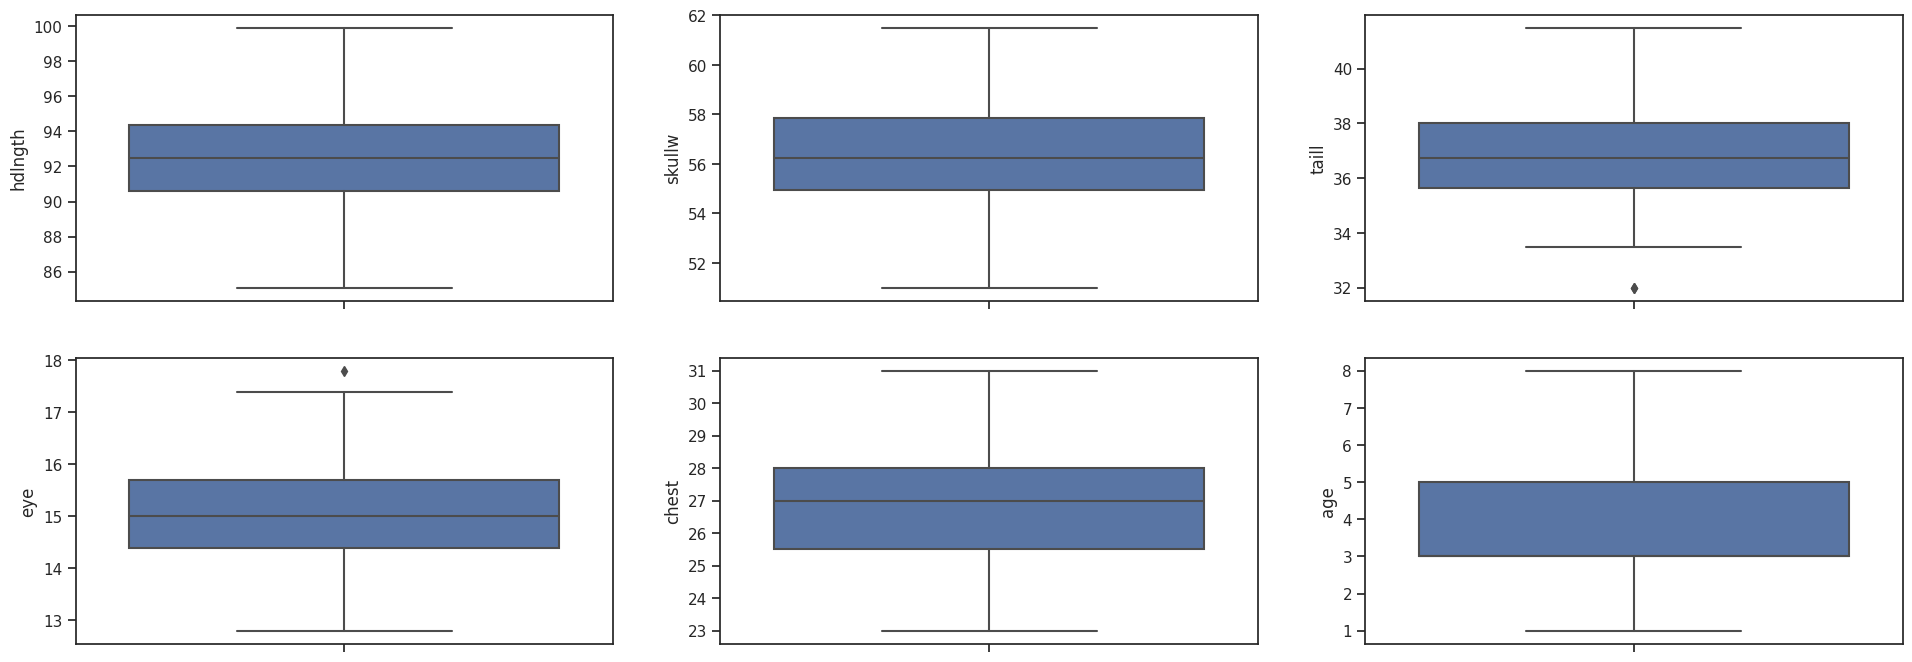

In [142]:
# Visualiser les outliers avec boxplot()
sns.set(style="ticks") 
plt.figure(figsize=(21,12))
plt.subplot(3,3,1)
sns.boxplot(data=data_opossum, y=data_opossum['hdlngth'])
plt.subplot(3,3,2)
sns.boxplot(data=data_opossum, y=data_opossum['skullw'])
plt.subplot(3,3,3)
sns.boxplot(data=data_opossum, y=data_opossum['taill'])
plt.subplot(3,3,4)
sns.boxplot(data=data_opossum, y=data_opossum['eye'])
plt.subplot(3,3,5)
sns.boxplot(data=data_opossum, y=data_opossum['chest'])
plt.subplot(3,3,6)
sns.boxplot(data=data_opossum, y=data_opossum['age'])

Cette ligne de code utilise la fonction set() de Seaborn pour définir le style des graphiques à "ticks" puis utilise la fonction figure() de Matplotlib pour créer une figure de taille (21,12). Il utilise ensuite la fonction subplot() pour créer une grille de 3 lignes et 3 colonnes et chaque sous-plot est utilisé pour afficher un boxplot de la colonne spécifique en utilisant la fonction boxplot() de Seaborn.

La fonction boxplot() de Seaborn permet de visualiser la distribution des données d'une variable quantitative en utilisant des boîtes à moustaches. La boîte inférieure représente le quartile inférieur (25ème percentile), la barre horizontale à l'intérieur de la boîte représente la médiane (50ème percentile), la boîte supérieure représente le quartile supérieur (75ème percentile) et les "moustaches" représentent les données extrêmes. Les points en dehors des moustaches sont considérés comme des outliers. Ces boxplots montrent la distribution des données après suppression des outliers pour les colonnes spécifiées.
Ici, on l'utilise pour voir si les outliers ont été bien suprimés.

In [143]:
data_opossum.info

<bound method DataFrame.info of       case  site  Pop  sex  age  hdlngth  skullw  totlngth  taill  footlgth  \
0      1.0   1.0  0.0  1.0  8.0     94.1    60.4      89.0   36.0      74.5   
1      2.0   1.0  0.0  0.0  6.0     92.5    57.6      91.5   36.5      72.5   
2      3.0   1.0  0.0  0.0  6.0     94.0    60.0      95.5   39.0      75.4   
3      4.0   1.0  0.0  0.0  6.0     93.2    57.1      92.0   38.0      76.1   
4      5.0   1.0  0.0  0.0  2.0     91.5    56.3      85.5   36.0      71.0   
..     ...   ...  ...  ...  ...      ...     ...       ...    ...       ...   
99   100.0   7.0  1.0  1.0  1.0     89.5    56.0      81.5   36.5      66.0   
100  101.0   7.0  1.0  1.0  1.0     88.6    54.7      82.5   39.0      64.4   
101  102.0   7.0  1.0  0.0  6.0     92.4    55.0      89.0   38.0      63.5   
102  103.0   7.0  1.0  1.0  4.0     91.5    55.2      82.5   36.5      62.9   
103  104.0   7.0  1.0  0.0  3.0     93.6    59.9      89.0   40.0      67.6   

     earconch   eye

In [144]:

data_opossum['age'].value_counts()

3.0    27
2.0    14
4.0    13
6.0    12
5.0    11
1.0     6
7.0     6
8.0     1
Name: age, dtype: int64

Il montre qu'il y a 27 opossums qui ont 3 ans, 14 qui ont 2 ans, 13 qui ont 4 ans, 12 qui ont 6 ans, 11 qui ont 5 ans, 6 qui ont 1 an, 6 qui ont 7 ans et 1 qui a 8 ans. La colonne "dtype" indique que le type de données des valeurs est un entier de 64 bits.

In [145]:
data_opossum['chest'].describe()

count    90.000000
mean     26.766667
std       1.764506
min      23.000000
25%      25.500000
50%      27.000000
75%      28.000000
max      31.000000
Name: chest, dtype: float64

## 7. Split ``du dataset``

### 1. Separation ``de données`` 

data_opossum_target = data_opossum['age']" est une instruction qui crée une variable "data_opossum_target" qui contient les valeurs de la colonne "âge" d'un DataFrame nommé "data_opossum".

"data_opossum.data = data_opossum.drop(['age'], axis=1)" est une instruction qui retire la colonne "âge" du DataFrame "data_opossum" en utilisant la méthode "drop" et assigne le DataFrame modifié à la variable "data_opossum.data". L'argument "axis=1" spécifie que nous voulons supprimer une colonne plutôt qu'une ligne. Cette instruction est généralement utilisée pour séparer les données en variables d'entrée (data_opossum.data) et variable cible (data_opossum_target) pour les modèles d'apprentissage automatique.

In [146]:
data_opossum_target = data_opossum['age']
data_opossum_data = data_opossum.drop(['age'], axis=1)

Ce code utilise le DataFrame "data_opossum" et enlève les colonnes 'site', 'age', 'sex', 'Pop', 'case', 'taill', 'eye', 'earconch' en utilisant la méthode "drop" avec l'argument "axis=1" indiquant que les colonnes sont supprimées. La variable "X" est définie comme le DataFrame modifié, tandis que la variable "y" est définie comme la colonne "age" du DataFrame d'origine "data_opossum".

In [147]:
X = data_opossum.drop(['site','age', 'sex', 'Pop','case'], axis=1)
y = data_opossum['age']

In [148]:
X

hdlngth  skullw  totlngth  taill  footlgth  earconch   eye  chest  belly
0       94.1    60.4      89.0   36.0      74.5      54.5  15.2   28.0   36.0
1       92.5    57.6      91.5   36.5      72.5      51.2  16.0   28.5   33.0
2       94.0    60.0      95.5   39.0      75.4      51.9  15.5   30.0   34.0
3       93.2    57.1      92.0   38.0      76.1      52.2  15.2   28.0   34.0
4       91.5    56.3      85.5   36.0      71.0      53.2  15.1   28.5   33.0
..       ...     ...       ...    ...       ...       ...   ...    ...    ...
99      89.5    56.0      81.5   36.5      66.0      46.8  14.8   23.0   27.0
100     88.6    54.7      82.5   39.0      64.4      48.0  14.0   25.0   33.0
101     92.4    55.0      89.0   38.0      63.5      45.4  13.0   25.0   30.0
102     91.5    55.2      82.5   36.5      62.9      45.9  15.4   25.0   29.0
103     93.6    59.9      89.0   40.0      67.6      46.0  14.8   28.5   33.5

[90 rows x 9 columns]

In [149]:
y

0      8.0
1      6.0
2      6.0
3      6.0
4      2.0
      ... 
99     1.0
100    1.0
101    6.0
102    4.0
103    3.0
Name: age, Length: 90, dtype: float64

Ce code utilise la fonction "train_test_split" de la bibliothèque scikit-learn pour diviser les données en deux ensemble de données d'entraînement et de test. Les variables X et y qui ont été définies précédemment sont utilisées en tant que données d'entrée pour la fonction. L'argument "test_size" est défini à 0,2, ce qui signifie que 20% des données seront utilisées pour le test et 80% pour l'entraînement. L'argument "random_state" est défini à 42, ce qui garantit que les données seront sélectionnées de manière aléatoire de la même manière chaque fois que le code est exécuté. Les variables "X_train", "X_test", "y_train" et "y_test" sont définies comme les données d'entraînement et de test respectivement. Enfin, les colonnes du X_train sont stockées dans une liste X_train_col.

In [150]:
# Séparation des données en ensemble d'entraînement et de test
from sklearn.model_selection import train_test_split #training and testing data split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)
# Colonnes
X_train_col = list(X_train.columns)
X_train_col

['hdlngth',
 'skullw',
 'totlngth',
 'taill',
 'footlgth',
 'earconch',
 'eye',
 'chest',
 'belly']

# Partie3 : Modélisation prédictive

 Voici les algorithmes que j'utiliserai pour créer le modèle :
 - PolynomialFeatures
 - LinearRegression
 - Ridge
- Lasso
 

In [151]:
#importing all the required ML packages
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn import svm #support vector Machine
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.naive_bayes import GaussianNB #Naive bayes
from sklearn.tree import DecisionTreeClassifier #Decision Tree
from sklearn.model_selection import train_test_split #training and testing data split
from sklearn import metrics #accuracy measure
from sklearn.metrics import confusion_matrix #for confusion matrix

In [152]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix

## Mise à l'échelle

In [153]:
from sklearn.preprocessing import StandardScaler
# Normalisation des données
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_scaler = scaler.transform(X)

In [154]:
X_train

array([[ 5.90202979e-01,  1.82307584e-01,  1.96736835e-03,
        -1.36883666e+00,  1.08484758e+00,  1.09463264e+00,
         2.68839686e-01,  1.16809677e-01, -9.40845199e-01],
       [ 1.15411255e+00,  5.69999663e-01,  1.11746522e+00,
        -5.42286728e-01,  1.33544737e+00,  1.25804937e+00,
         8.16916174e-02,  7.05530451e-01, -3.44134653e-01],
       [ 4.84469933e-01,  4.73076643e-01,  3.73799987e-01,
         5.59779849e-01, -5.42423790e-02, -1.54338015e+00,
        -9.47622762e-01,  1.29425122e+00,  2.44051456e+00],
       [ 1.92948822e+00,  2.21769100e+00,  1.61324205e+00,
         1.66184643e+00, -1.22587776e-01, -9.36403755e-01,
         7.36709859e-01,  9.99890838e-01,  5.36723771e-02],
       [ 3.43492539e-01,  8.12307212e-01,  9.93521018e-01,
         5.59779849e-01, -2.36496772e-01, -5.39534574e-01,
         1.39172810e+00, -4.71911096e-01,  4.51479408e-01],
       [-9.95792704e-01, -7.86922611e-01, -1.11353049e+00,
        -1.09332002e+00,  6.29211596e-01,  8.611801

In [155]:
data_opossum.info



<bound method DataFrame.info of       case  site  Pop  sex  age  hdlngth  skullw  totlngth  taill  footlgth  \
0      1.0   1.0  0.0  1.0  8.0     94.1    60.4      89.0   36.0      74.5   
1      2.0   1.0  0.0  0.0  6.0     92.5    57.6      91.5   36.5      72.5   
2      3.0   1.0  0.0  0.0  6.0     94.0    60.0      95.5   39.0      75.4   
3      4.0   1.0  0.0  0.0  6.0     93.2    57.1      92.0   38.0      76.1   
4      5.0   1.0  0.0  0.0  2.0     91.5    56.3      85.5   36.0      71.0   
..     ...   ...  ...  ...  ...      ...     ...       ...    ...       ...   
99   100.0   7.0  1.0  1.0  1.0     89.5    56.0      81.5   36.5      66.0   
100  101.0   7.0  1.0  1.0  1.0     88.6    54.7      82.5   39.0      64.4   
101  102.0   7.0  1.0  0.0  6.0     92.4    55.0      89.0   38.0      63.5   
102  103.0   7.0  1.0  1.0  4.0     91.5    55.2      82.5   36.5      62.9   
103  104.0   7.0  1.0  0.0  3.0     93.6    59.9      89.0   40.0      67.6   

     earconch   eye

In [156]:
# Transformation des données pour la régression polynomiale
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)
X_poly = poly.transform(X_scaler)

In [157]:
# Initialisation des modèles
linear = LinearRegression()
ridge = Ridge()
lasso = Lasso()


In [158]:
# Entraînement des modèles
linear.fit(X_train_poly, y_train)
ridge.fit(X_train_poly, y_train)
lasso.fit(X_train_poly, y_train)


Lasso()

In [159]:
# Calcul des scores de validation croisée pour chaque modèle
scores_linear = cross_val_score(linear, X_train_poly, y_train, cv=5)
scores_ridge = cross_val_score(ridge, X_train_poly, y_train, cv=5)
scores_lasso = cross_val_score(lasso, X_train_poly, y_train, cv=5)


In [160]:
# Afficher les scores de validation croisée
print("Linear Regression CV Score: {:.2f} +/- {:.2f}".format(scores_linear.mean(), scores_linear.std()))
print("Ridge Regression CV Score: {:.2f} +/- {:.2f}".format(scores_ridge.mean(), scores_ridge.std()))
print("Lasso Regression CV Score: {:.2f} +/- {:.2f}".format(scores_lasso.mean(), scores_lasso.std()))


Linear Regression CV Score: -44.51 +/- 48.45
Ridge Regression CV Score: -1.18 +/- 1.31
Lasso Regression CV Score: -0.03 +/- 0.04


In [161]:
# Affichage des scores de validation croisée pour chaque modèle
print("Scores Linear :", scores_linear)
print("Scores Ridge :", scores_ridge)
print("Scores Lasso :", scores_lasso)


Scores Linear : [ -13.35536786  -16.96257692   -3.47285304 -135.30020074  -53.48365287]
Scores Ridge : [-3.55092018 -0.35286085 -1.49341773  0.20505867 -0.69835253]
Scores Lasso : [ 0.         -0.00394925 -0.08396467 -0.07769611 -0.00271039]


In [162]:
# Evaluation des modèles sur les données de test
y_pred_linear = linear.predict(X_test_poly)
y_pred_ridge = ridge.predict(X_test_poly)
y_pred_lasso = lasso.predict(X_test_poly)


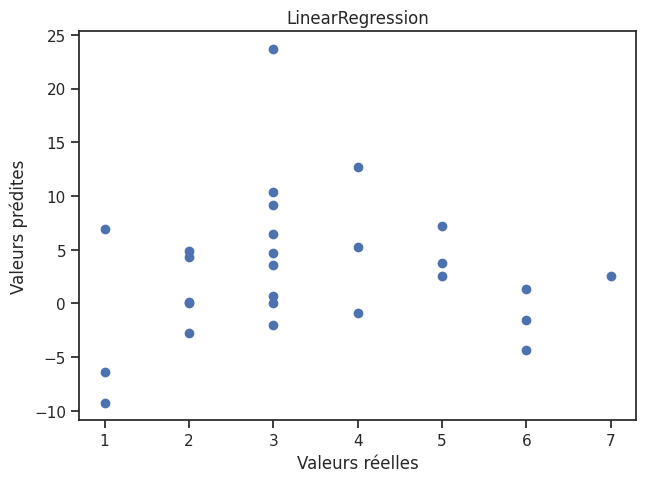

In [163]:
# Visualisation des résultats
plt.scatter(y_test, y_pred_linear)
plt.xlabel("Valeurs réelles")
plt.ylabel("Valeurs prédites")
plt.title("LinearRegression")
plt.show()

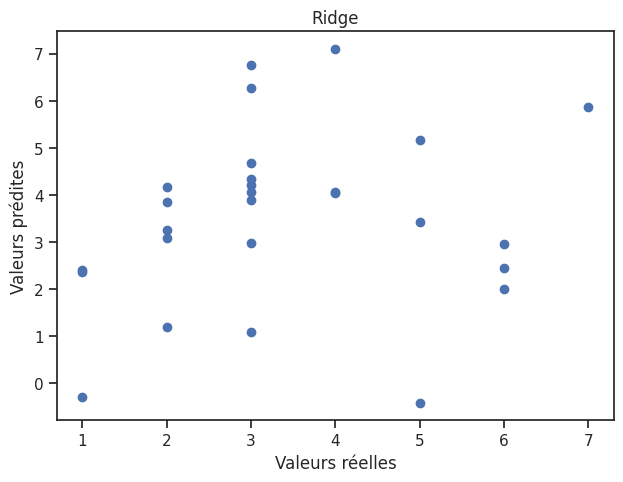

In [164]:
# Visualisation des résultats
plt.scatter(y_test, y_pred_ridge)
plt.xlabel("Valeurs réelles")
plt.ylabel("Valeurs prédites")
plt.title("Ridge")
plt.show()

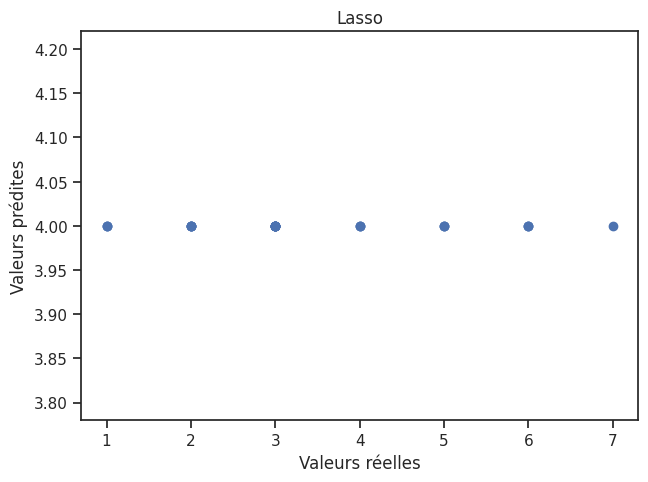

In [165]:
# Visualisation des résultats
plt.scatter(y_test, y_pred_lasso)
plt.xlabel("Valeurs réelles")
plt.ylabel("Valeurs prédites")
plt.title("Lasso")
plt.show()

In [166]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV

# Division du jeu de données en jeu d'entraînement et de test
X_train_poly, X_test_poly = X_poly[:25], X_poly[25:]
y_train, y_test = y[:25], y[25:]

# Modèle de régression linéaire
model = LinearRegression()

# Paramètres à tester lors de la grille de recherche
param = {}

# Initialisation de la grille de recherche
grid_search = GridSearchCV(model, param, cv=5)

# Entraînement du modèle
grid_search.fit(X_train_poly, y_train)

# Evaluation du modèle
y_pred = grid_search.predict(X_test_poly)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

#Affichage des resultats
print(f"Model: {grid_search}")
print(f"Meilleurs paramètres: {grid_search.best_params_}")
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"R2: {r2:.2f}\n")

Model: GridSearchCV(cv=5, estimator=LinearRegression(), param_grid={})
Meilleurs paramètres: {}
MAE: 5.55
MSE: 53.30
R2: -18.48



L'erreur absolue moyenne (MAE) est de 5,55, ce qui signifie que la moyenne des différences absolues entre les valeurs prédites et les valeurs réelles est de 5,55.

L'erreur quadratique moyenne (MSE) est de 53,30, ce qui signifie que la moyenne des différences au carré entre les valeurs prédites et les valeurs réelles est de 53,30.

Le coefficient de détermination (R2) est de -18,48, ce qui signifie que le modèle n'explique pas bien les données. Un R2 proche de 0 indique un modèle faible et un R2 proche de 1 indique un modèle fort. Un R2 négatif signifie que le modèle est pire que la simple prédiction en utilisant la moyenne des données.

In [167]:
import numpy as np
y_pred_linear = [int(x) for x in y_pred_linear]
y_test = [int(x) for x in y_test]

if len(y_test) != len(y_pred_linear):
    y_pred_linear = np.resize(y_pred_linear, len(y_test))
print("Matrice de confusion Linear :", confusion_matrix(y_test, y_pred_linear))


Matrice de confusion Linear : [[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 1 2 0 0 0 0 0 0 0 0 0 0 1]
 [0 0 0 1 1 1 1 1 1 1 0 1 0 1 0 0 0]
 [1 0 1 2 0 3 0 1 2 2 2 2 2 2 1 1 1]
 [0 0 2 2 0 1 1 0 1 0 0 0 0 0 0 2 0]
 [0 0 0 0 0 0 0 1 1 2 0 2 0 0 1 0 0]
 [0 1 0 0 1 2 0 1 0 2 0 0 0 0 0 0 0]
 [1 1 0 0 0 2 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]


In [168]:

if len(y_test) != len(y_pred_linear):
    y_pred_linear_copy = []
    for i in range(len(y_test)):
        y_pred_linear_copy.append(y_pred_linear[i])
    print("Matrice de confusion Linear :", confusion_matrix(y_test, y_pred_linear_copy))


In [169]:
# Matrice de confusion
import numpy as np
if len(y_test) != len(y_pred_ridge):
    y_pred_ridge = np.resize(y_pred_ridge, len(y_test))

y_pred_ridge = [round(x) for x in y_pred_ridge]


print("Matrice de confusion Ridge :", confusion_matrix(y_test, y_pred_ridge))


Matrice de confusion Ridge : [[0 0 0 0 0 0 0 0]
 [0 0 2 1 2 0 0 0]
 [0 1 2 0 4 0 2 0]
 [2 2 1 5 7 3 1 2]
 [1 2 1 3 0 0 0 2]
 [1 0 1 1 1 1 1 1]
 [0 0 2 1 2 1 1 0]
 [1 0 1 1 2 0 0 0]]


In [170]:
# Matrice de confusion
import numpy as np
if len(y_test) != len(y_pred_lasso):
    y_pred_lasso = np.resize(y_pred_lasso, len(y_test))
# print("Matrice de confusion Linear :", confusion_matrix(y_test, y_pred_lasso))

y_pred_lasso = [round(x) for x in y_pred_lasso]


print("Matrice de confusion Lasso :", confusion_matrix(y_test, y_pred_lasso))

Matrice de confusion Lasso : [[ 0  0  0  5  0  0  0]
 [ 0  0  0  9  0  0  0]
 [ 0  0  0 23  0  0  0]
 [ 0  0  0  9  0  0  0]
 [ 0  0  0  7  0  0  0]
 [ 0  0  0  7  0  0  0]
 [ 0  0  0  5  0  0  0]]


Ce code utilise la classe "LinearRegression" de la bibliothèque scikit-learn pour entraîner un modèle de régression linéaire sur les données normalisées d'entraînement X_train_scal et les étiquettes y_train. Il crée un objet "reg" de la classe LinearRegression et utilise la méthode "fit" pour entraîner le modèle. Ensuite, Il utilise la méthode "predict" pour prédire les étiquettes de l'ensemble de données de test X_test_scal et stocker les prédictions dans la variable "y_pred_scal". Les métriques Mean Squared Error (erreur quadratique moyenne) et R-squared (coefficient de détermination) sont calculées en utilisant les fonctions "mean_squared_error" et "r2_score" de la bibliothèque scikit-learn respectivement, en utilisant les valeurs réelles y_test et les prédictions y_pred_scal. Les valeurs de ces métriques sont ensuite affichées à l'aide des instructions "print".

In [171]:
# sauvegarde des données
import pickle
pickle.dump(linear, open('linear.pkl','wb'))
pickle.dump(ridge, open ('ridge.pkl', 'wb'))
pickle.dump(lasso, open('lasso.pkl', 'wb'))
pickle.dump(X_poly, open('X_poly.pkl', 'wb'))
pickle.dump(data_opossum, open('data_opossum.pkl', 'wb'))
pickle.dump(X, open('X', 'wb'))
pickle.dump(y, open('y', 'wb'))


## **Conclusion** :

Ces données indiquent que le modèle utilisé pour prédire les valeurs n'a pas bien fonctionné. L'erreur absolue moyenne (MAE) et l'erreur quadratique moyenne (MSE) sont relativement élevées, ce qui signifie que les valeurs prédites sont très éloignées des valeurs réelles. Le coefficient de détermination (R2) est négatif, ce qui est encore plus préoccupant et indique que le modèle ne peut même pas expliquer les données mieux que la simple prédiction en utilisant la moyenne des données. En général, ces résultats montrent qu'il est nécessaire d'améliorer le modèle ou d'utiliser un modèle différent pour obtenir des résultats plus précis et utiles.